C:\Users\Administrator\AppData\Local\Temp\ipykernel_23848\1710018784.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=figsize)


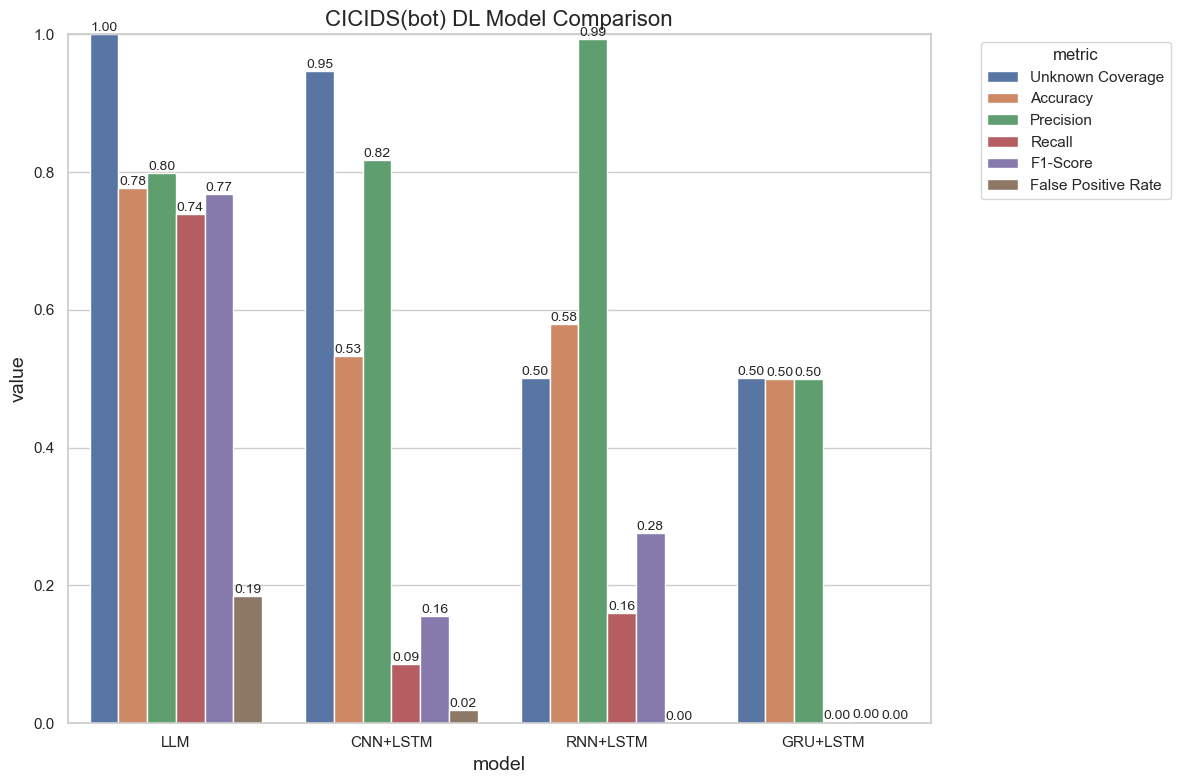

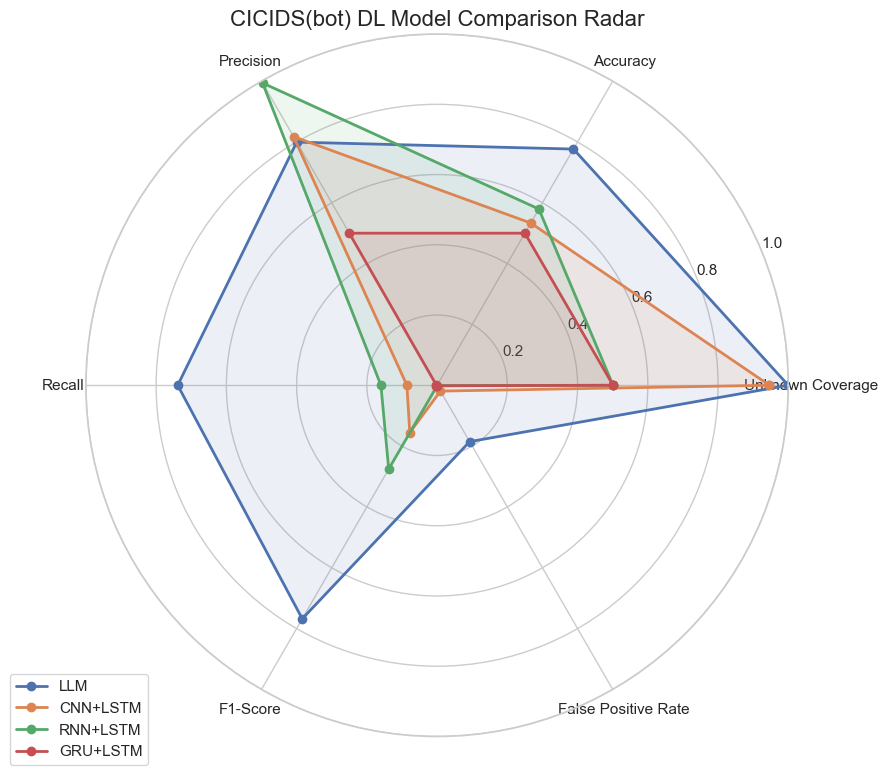

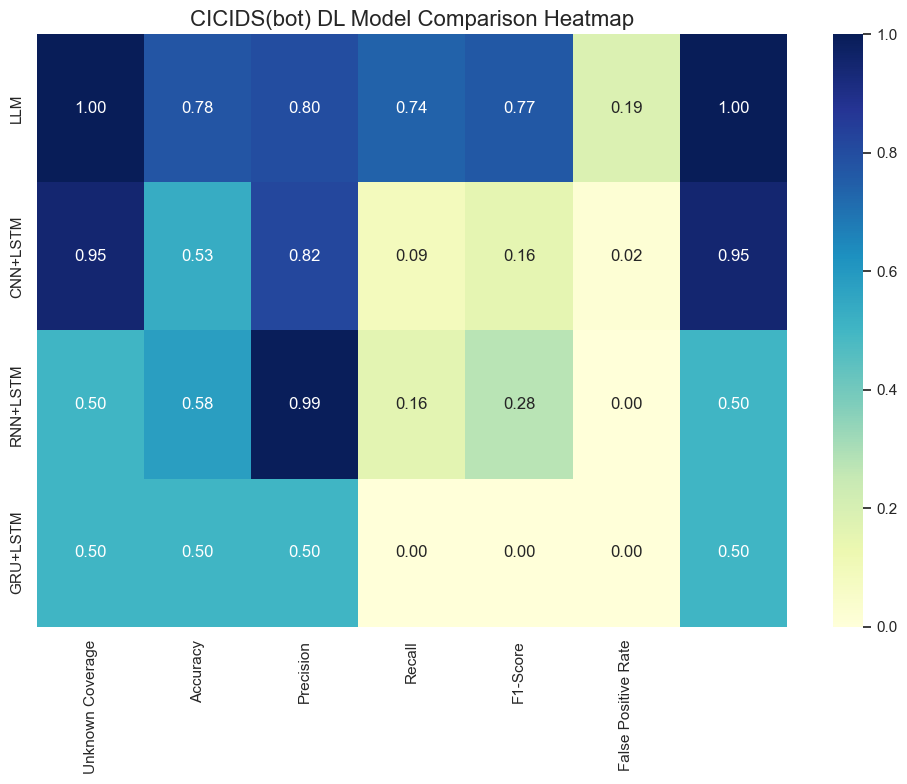

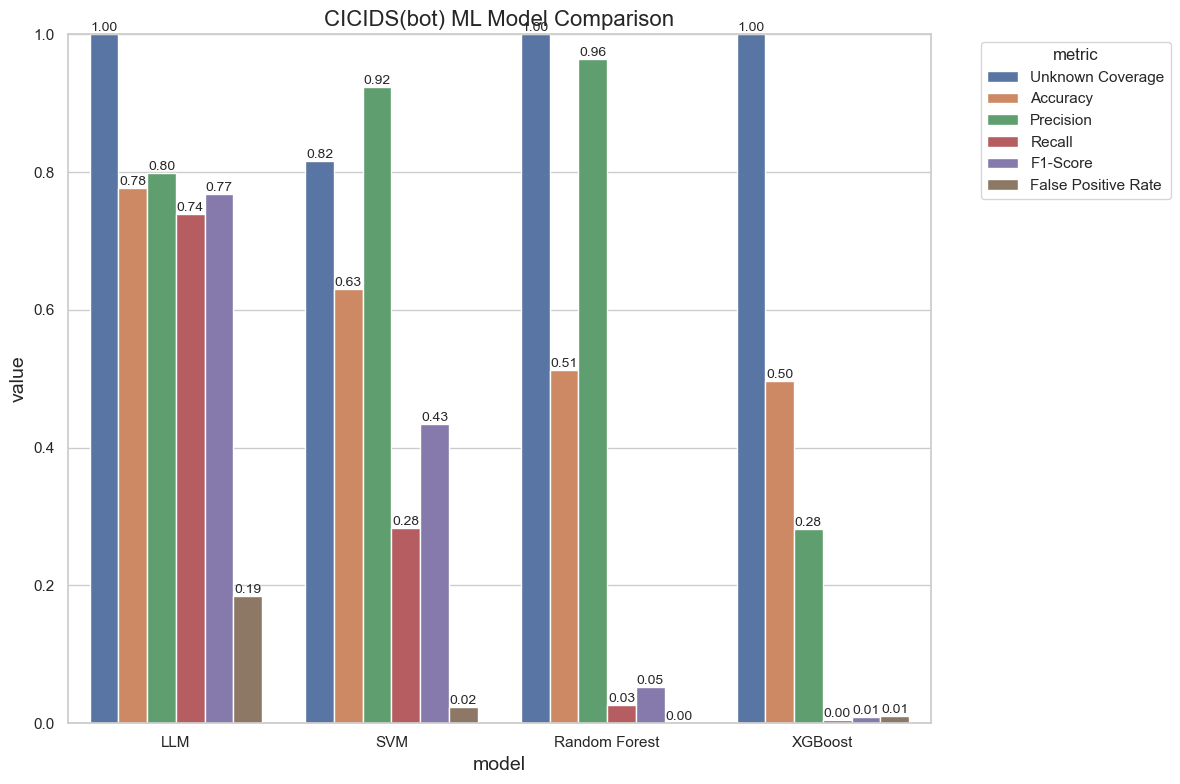

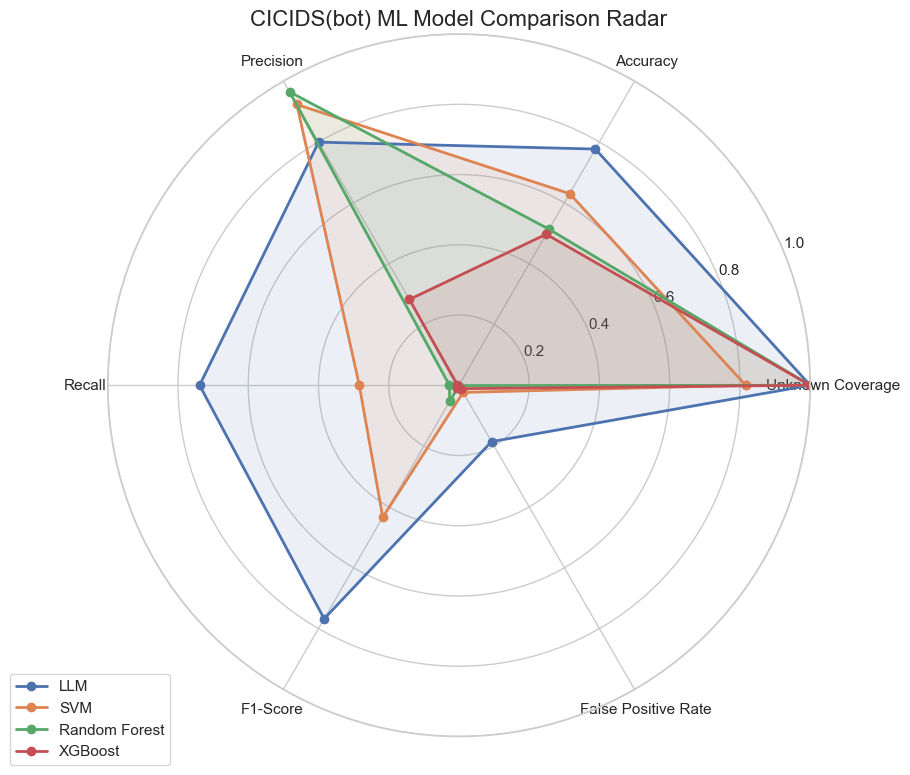

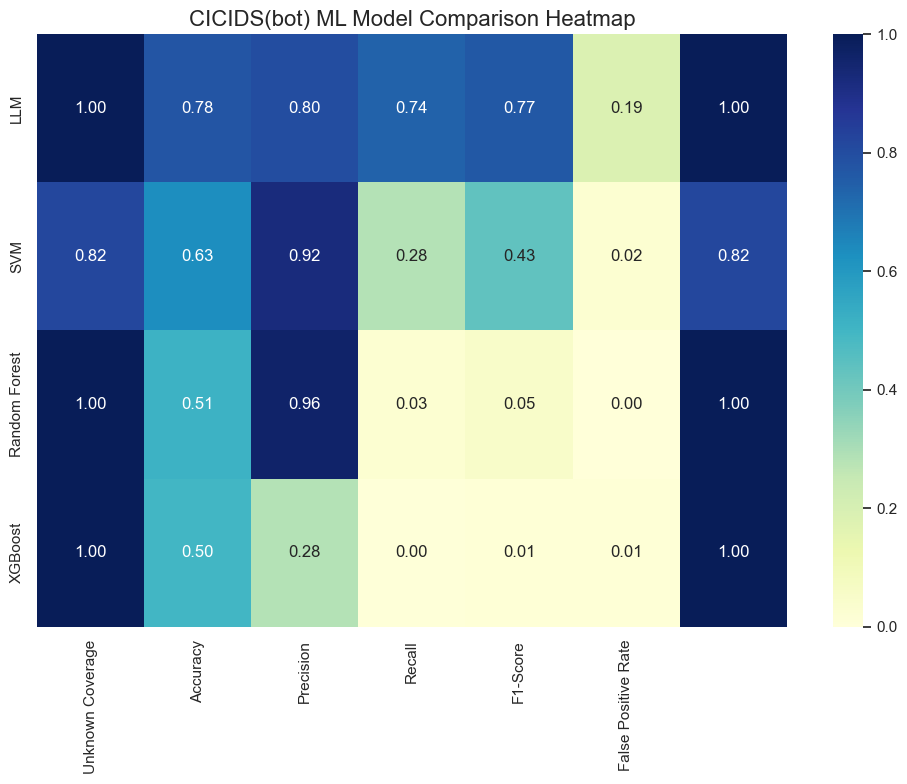

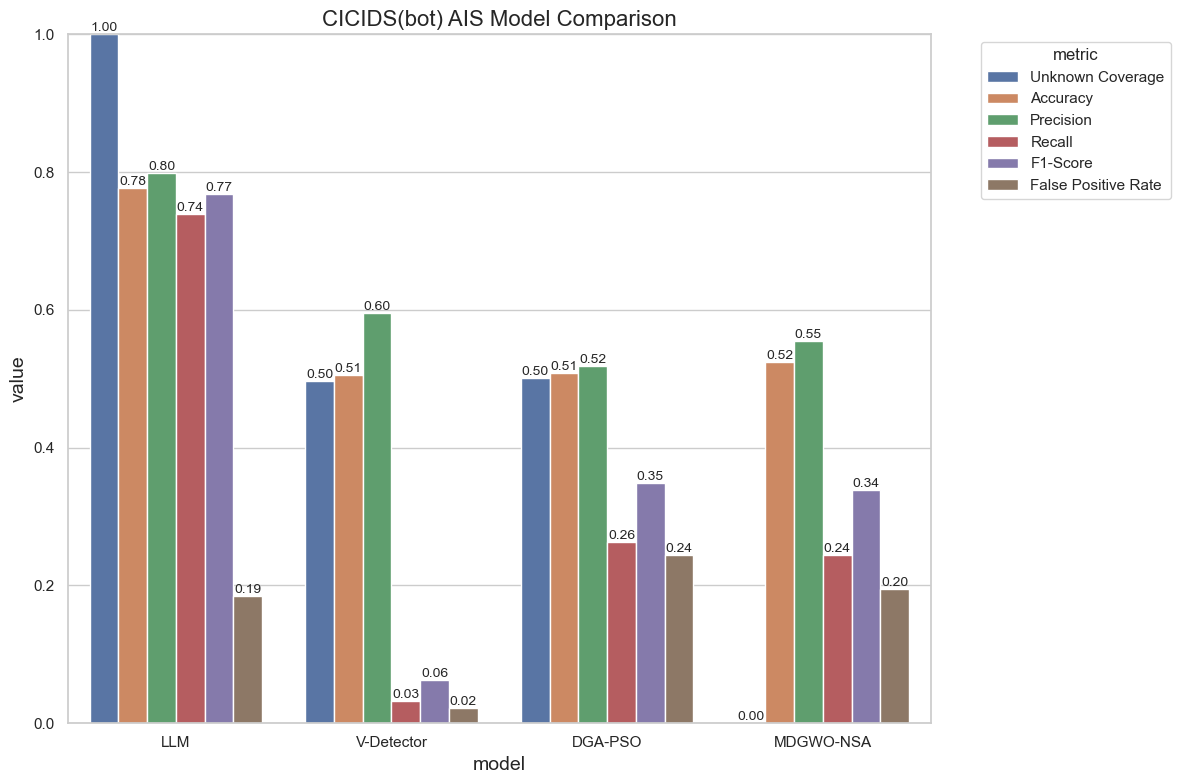

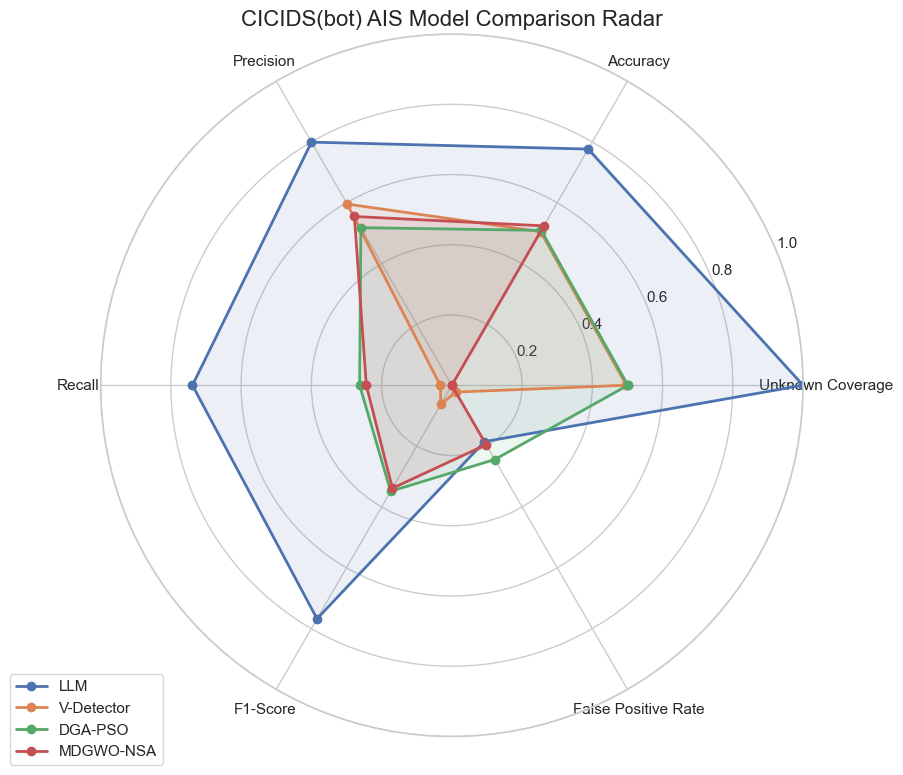

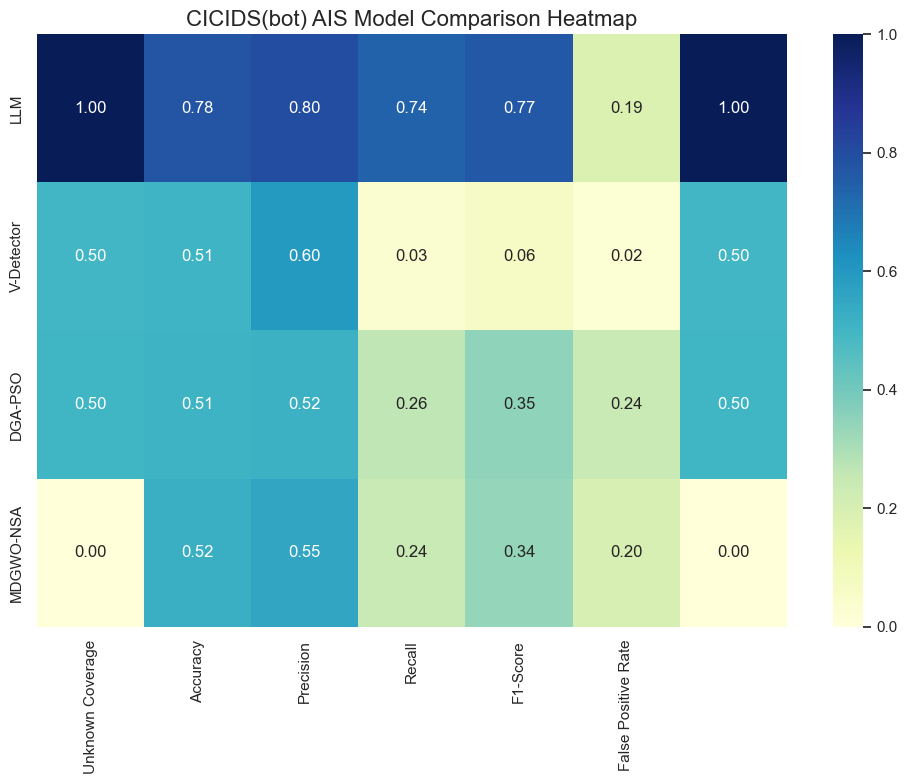

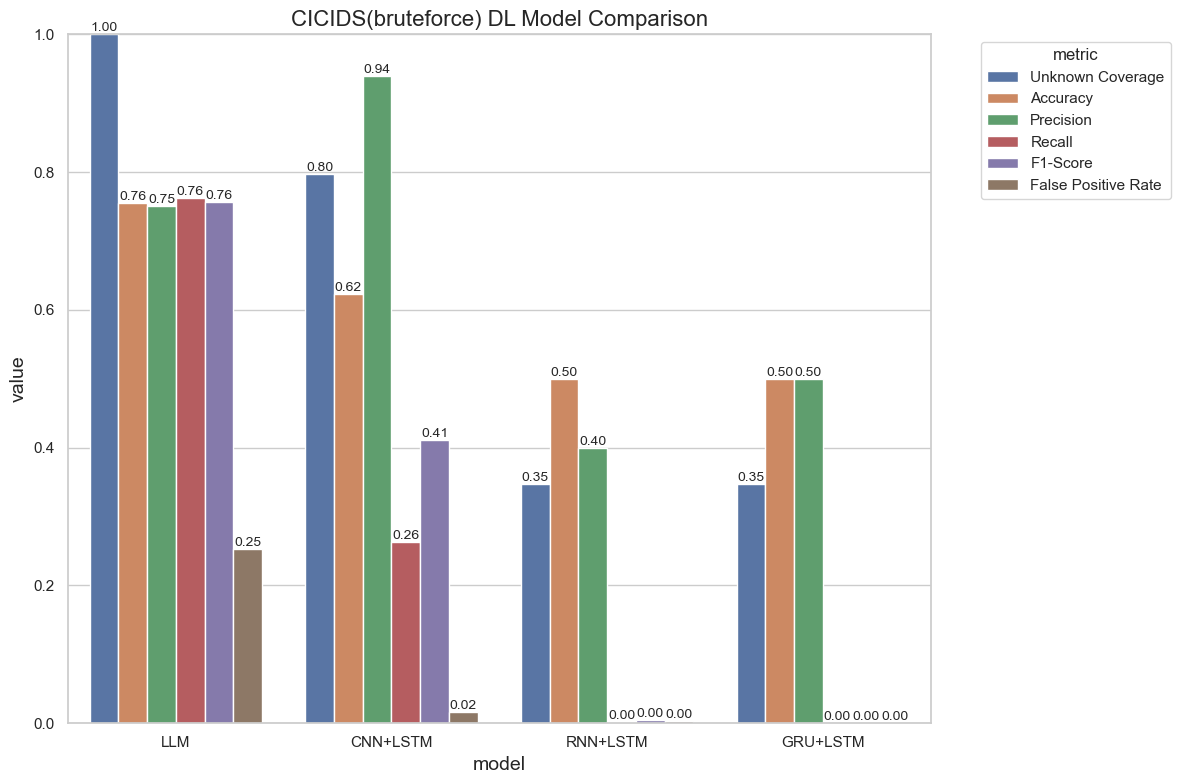

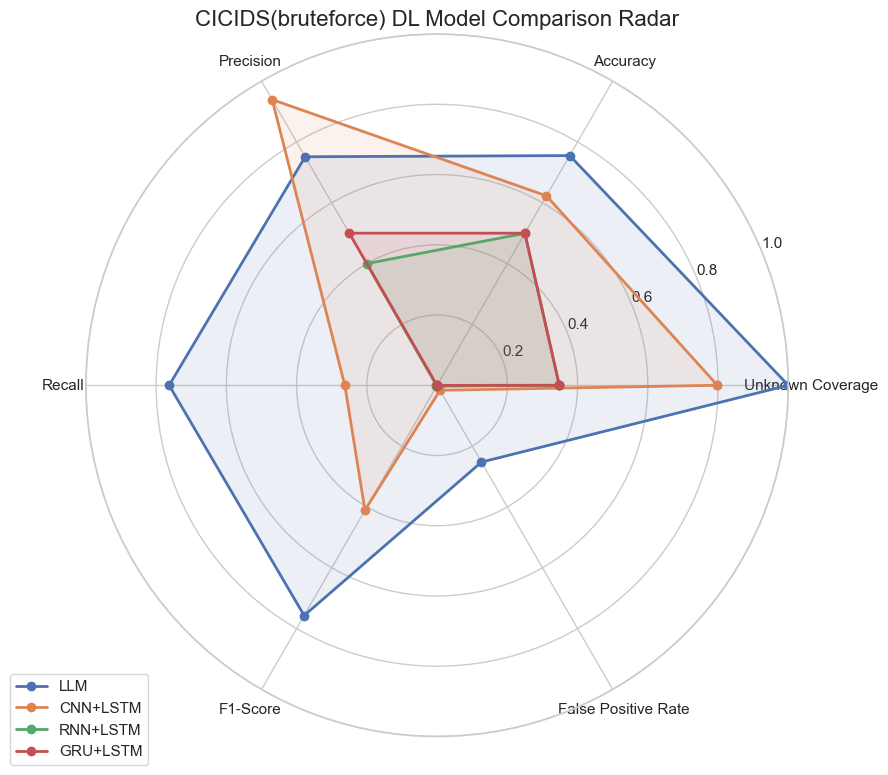

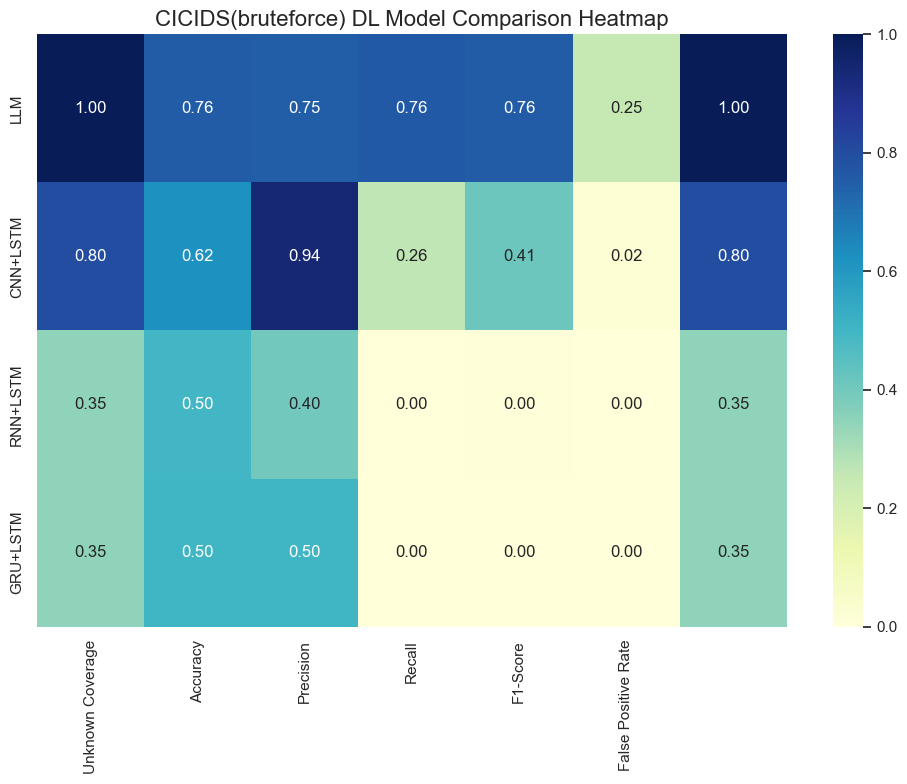

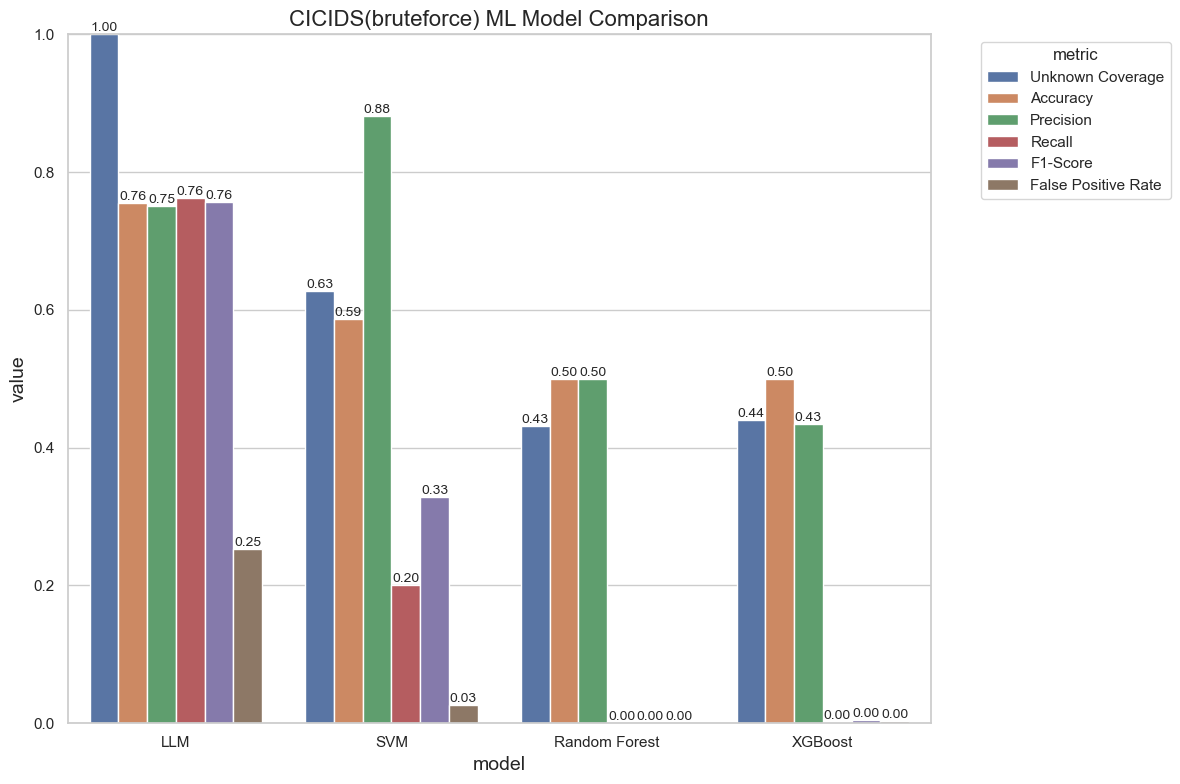

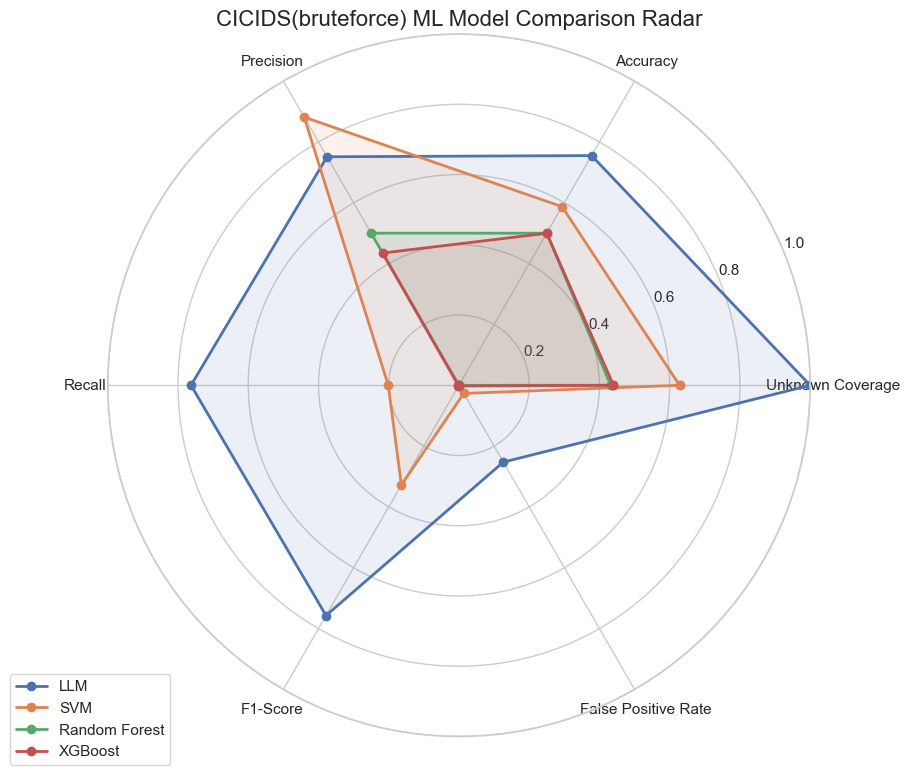

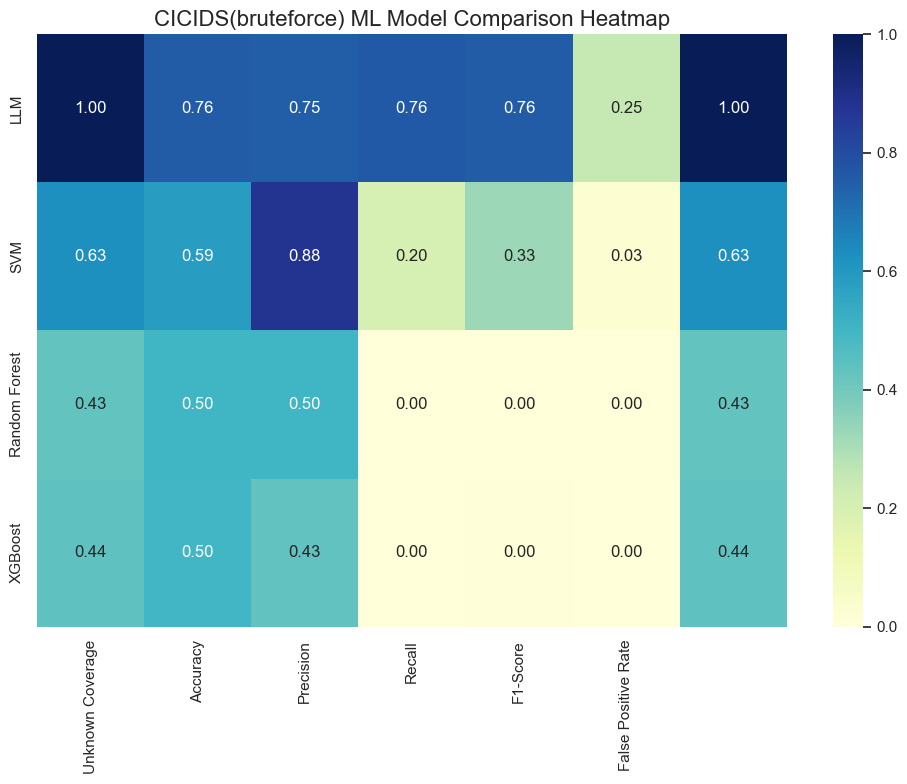

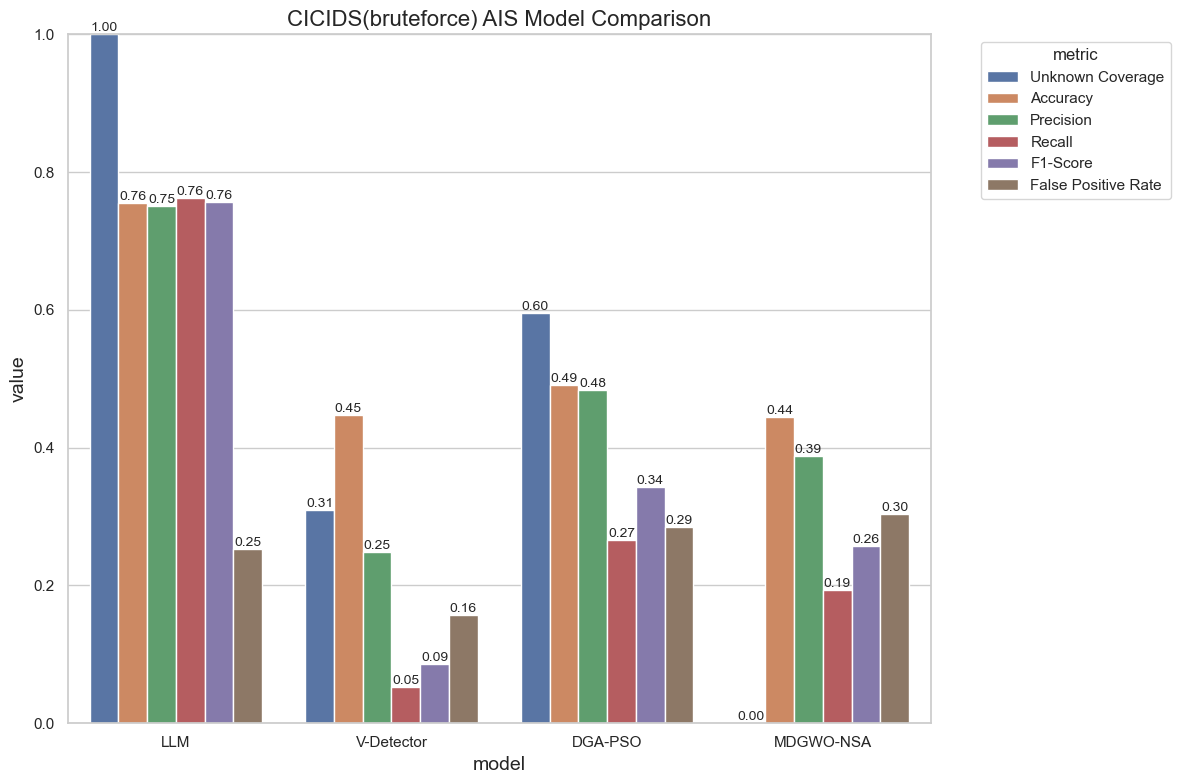

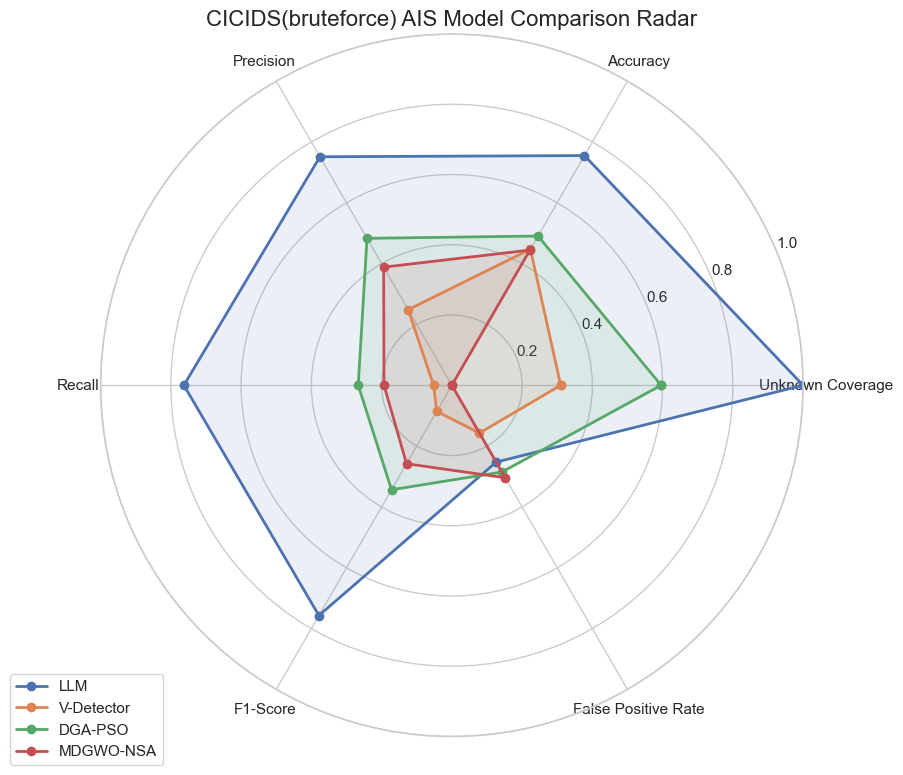

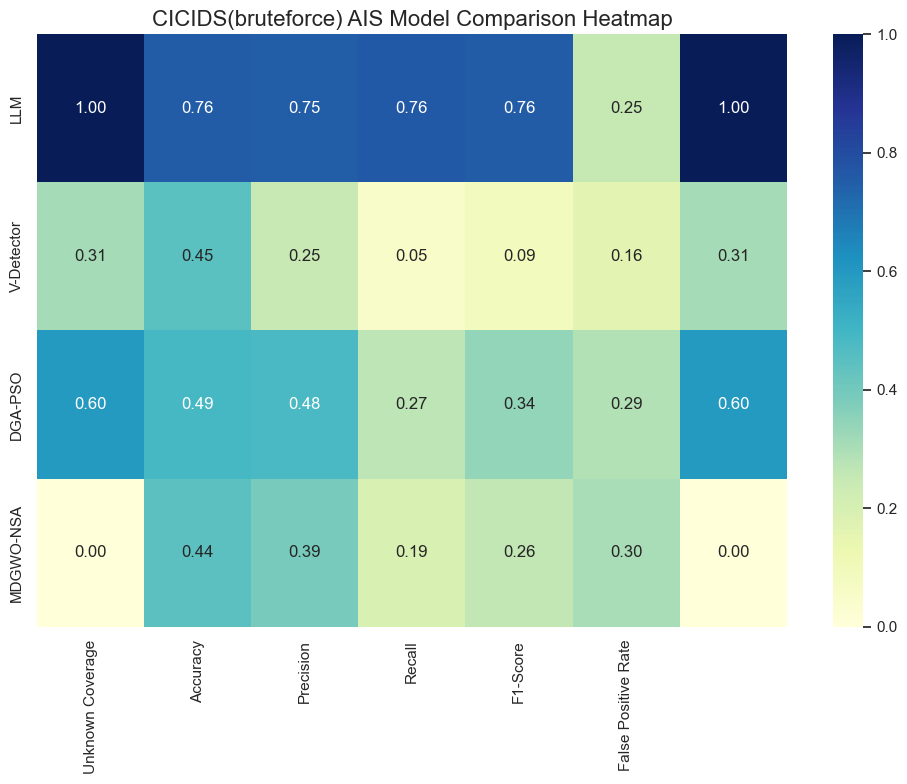

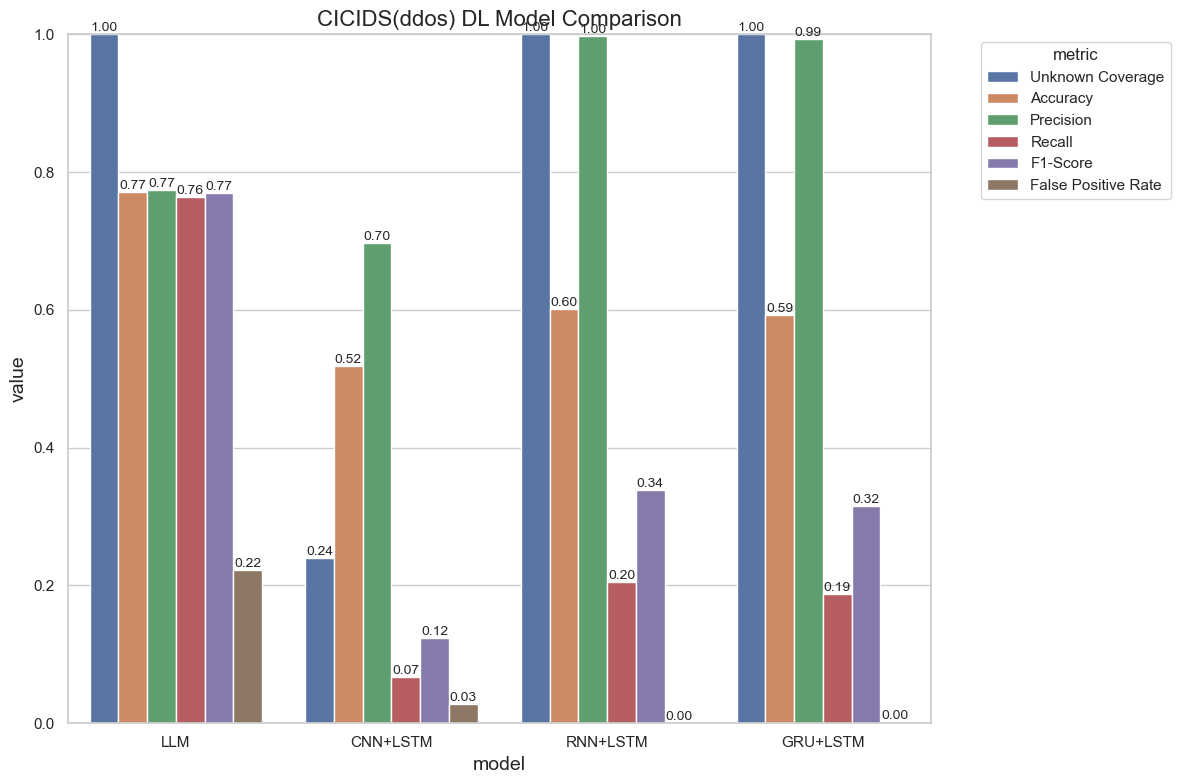

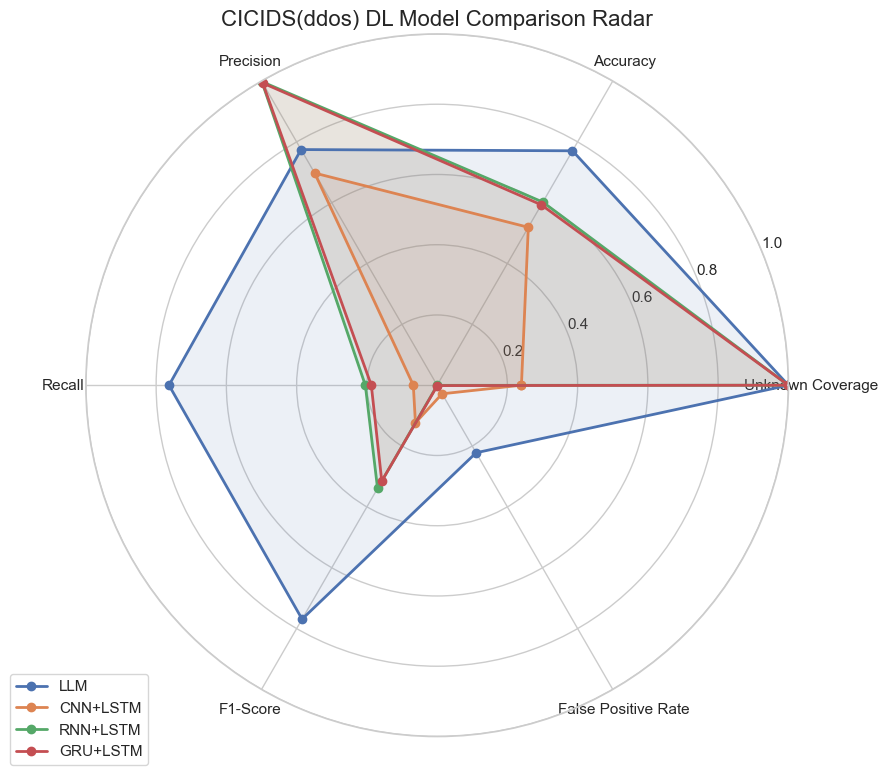

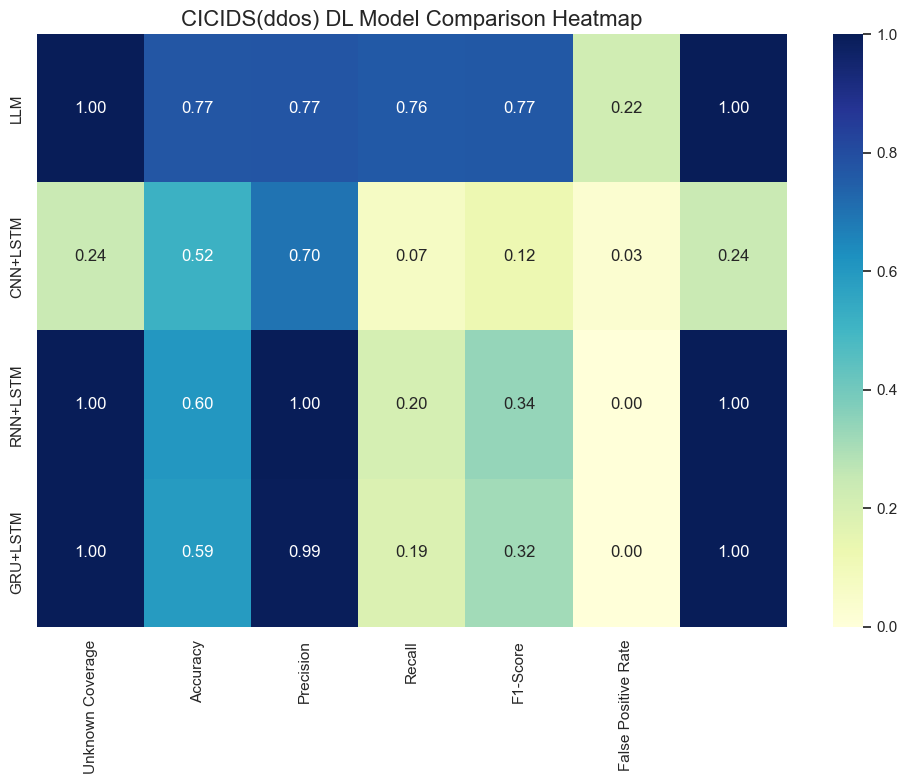

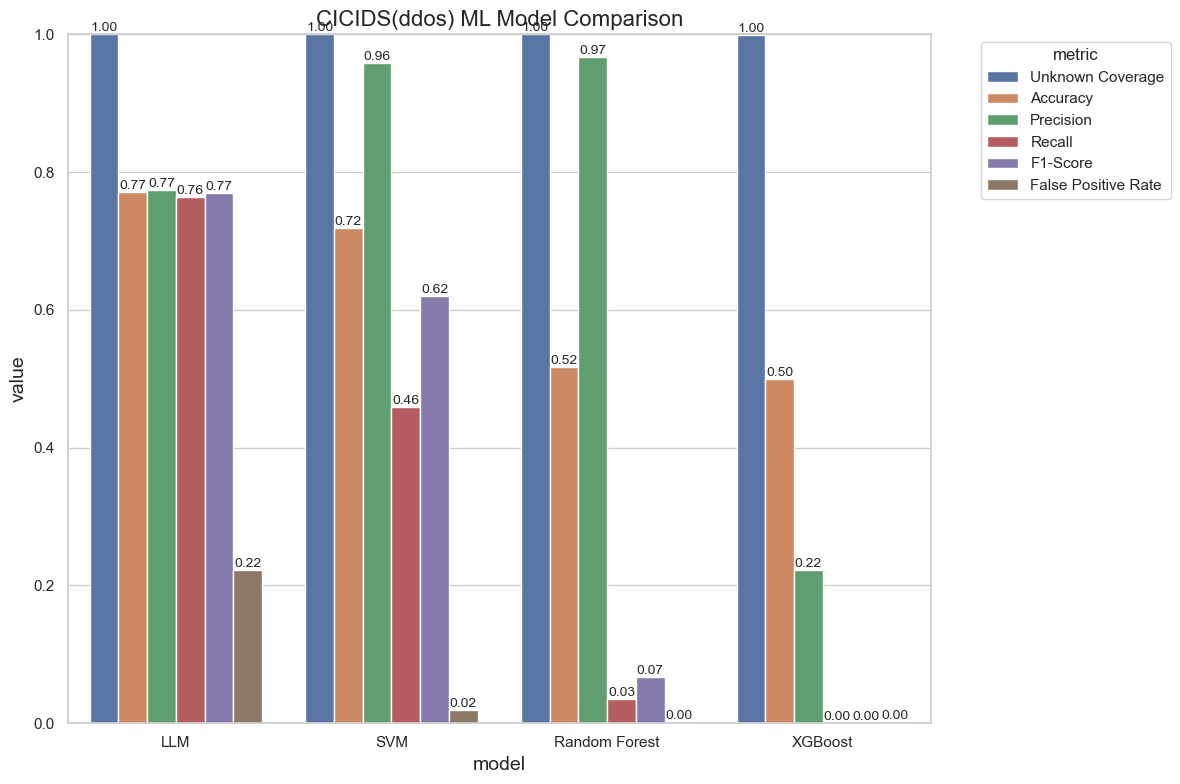

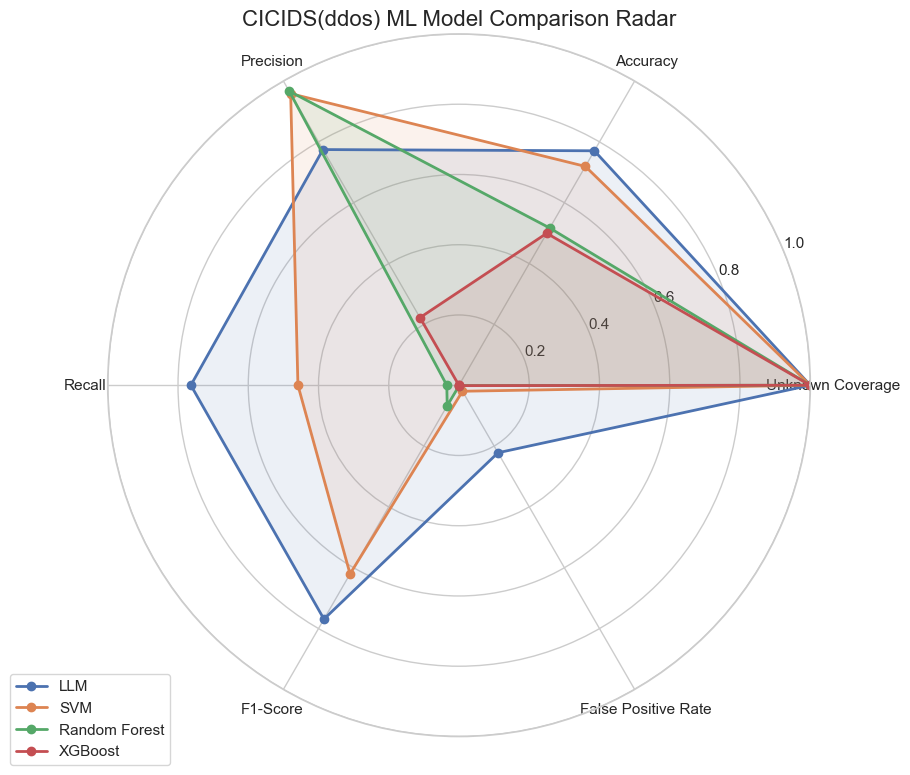

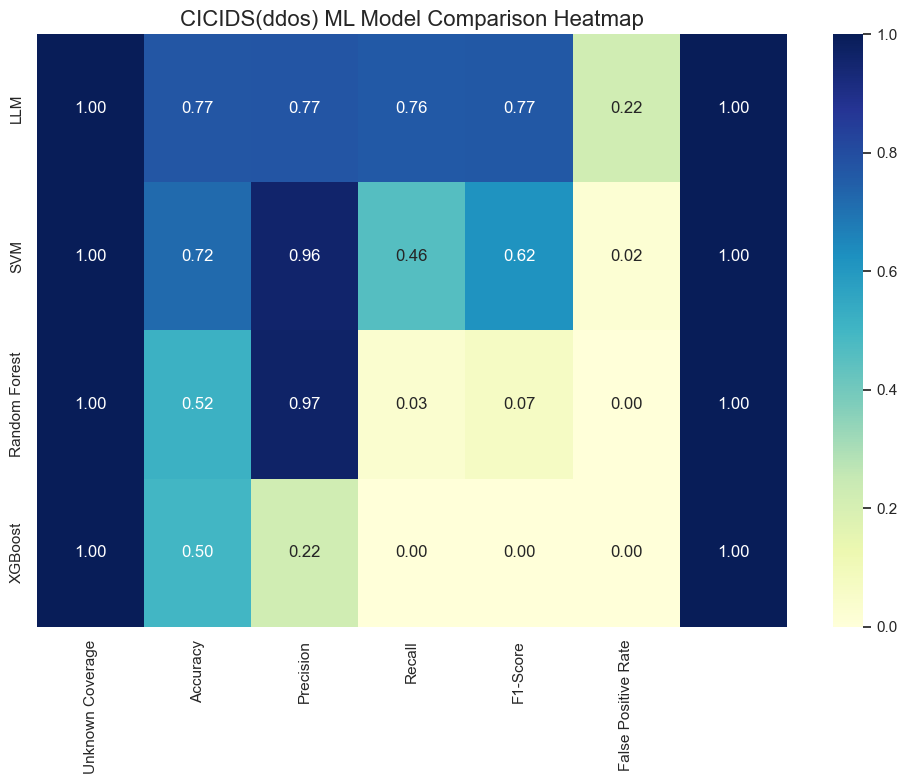

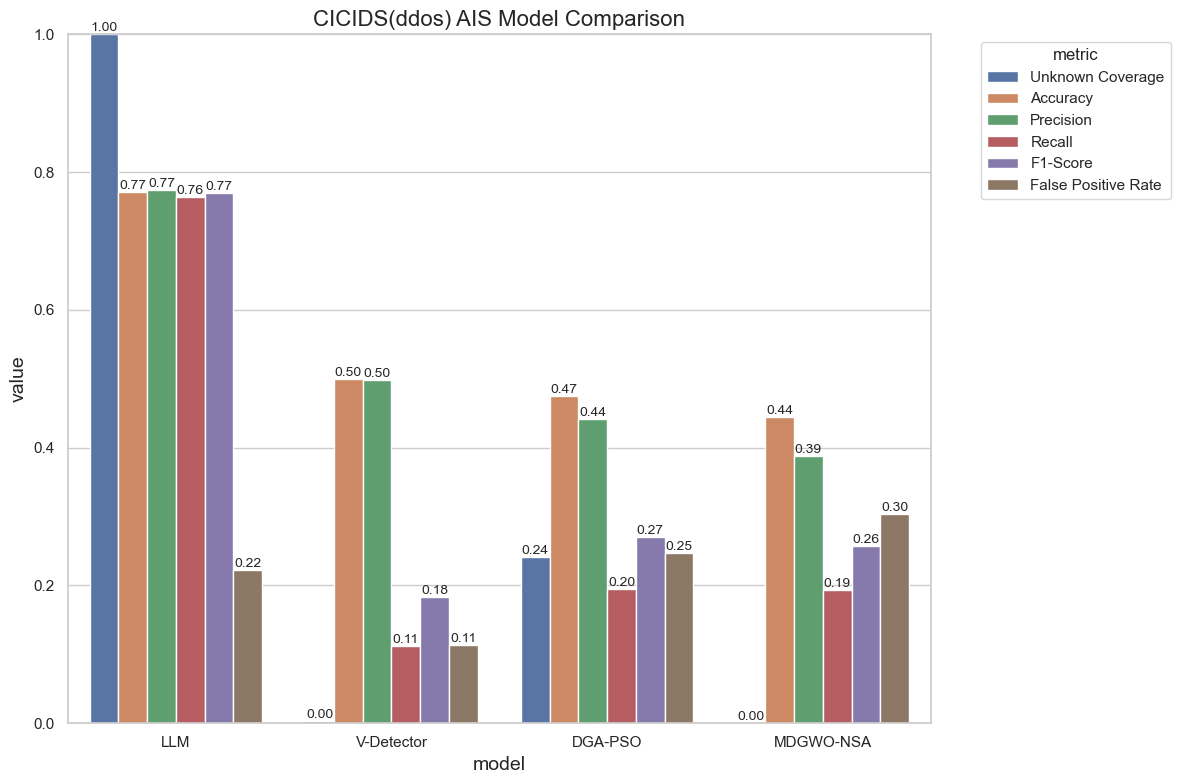

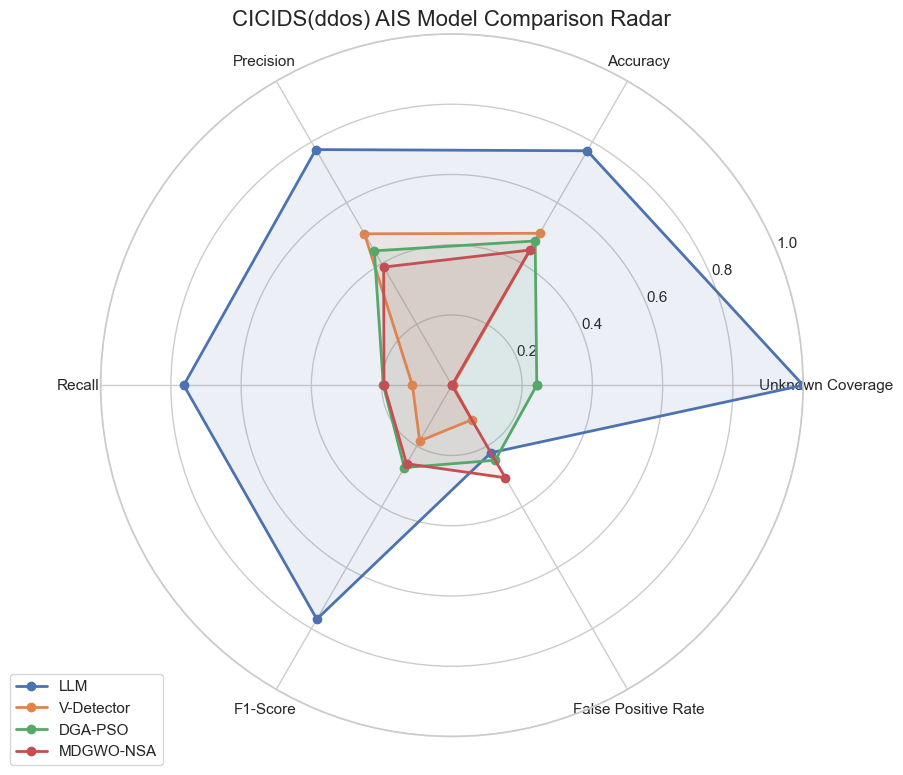

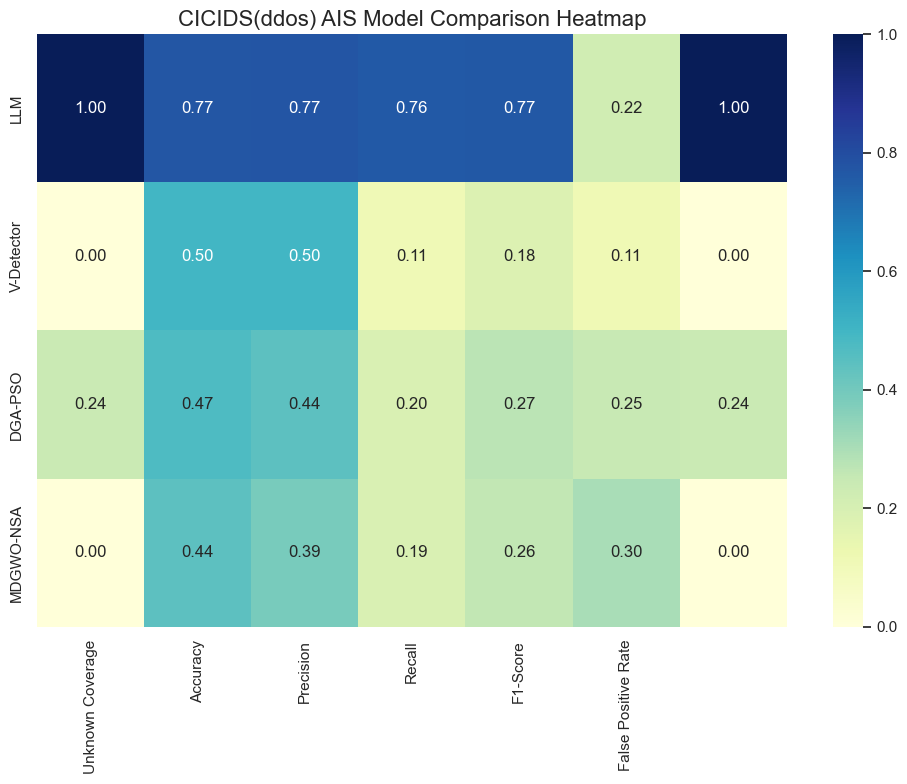

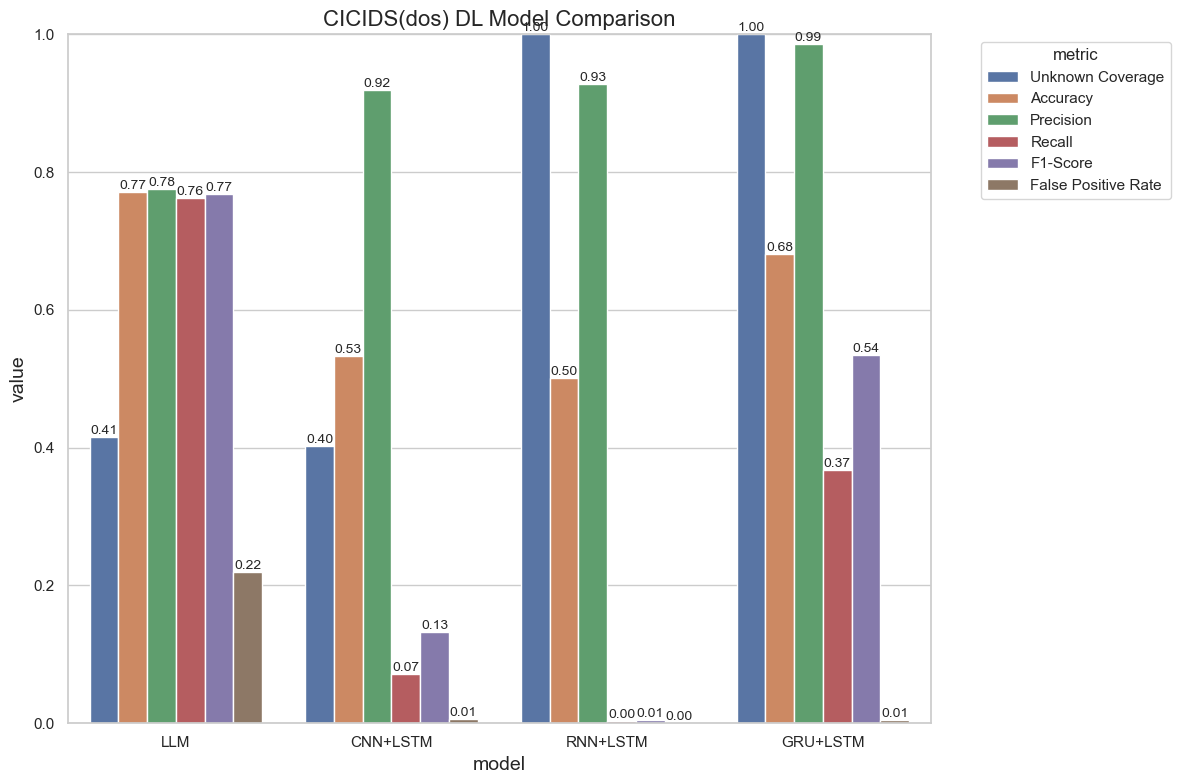

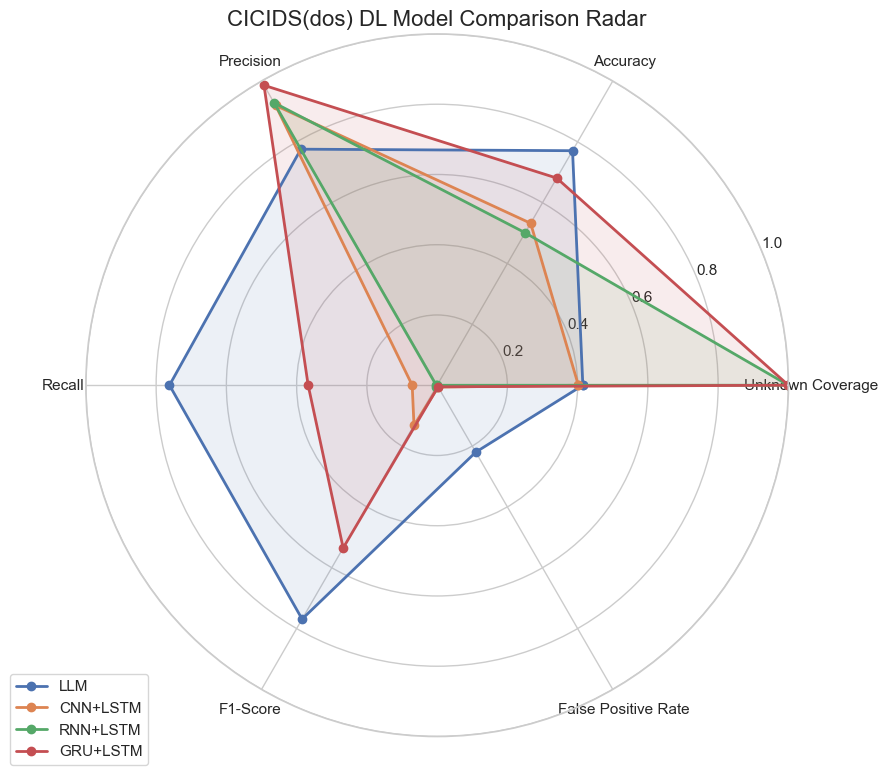

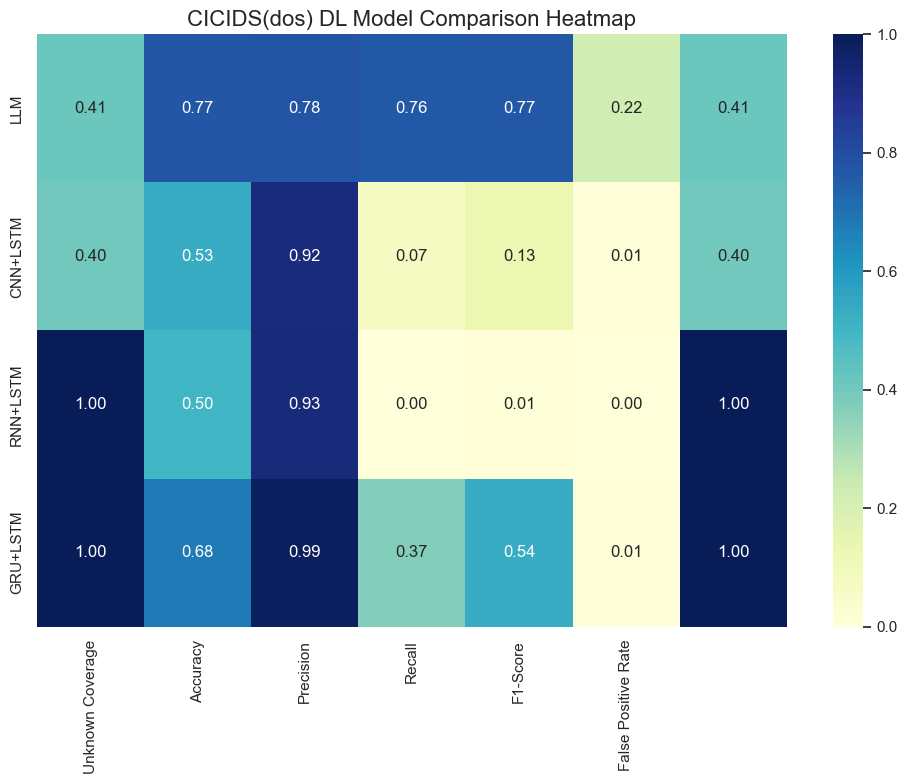

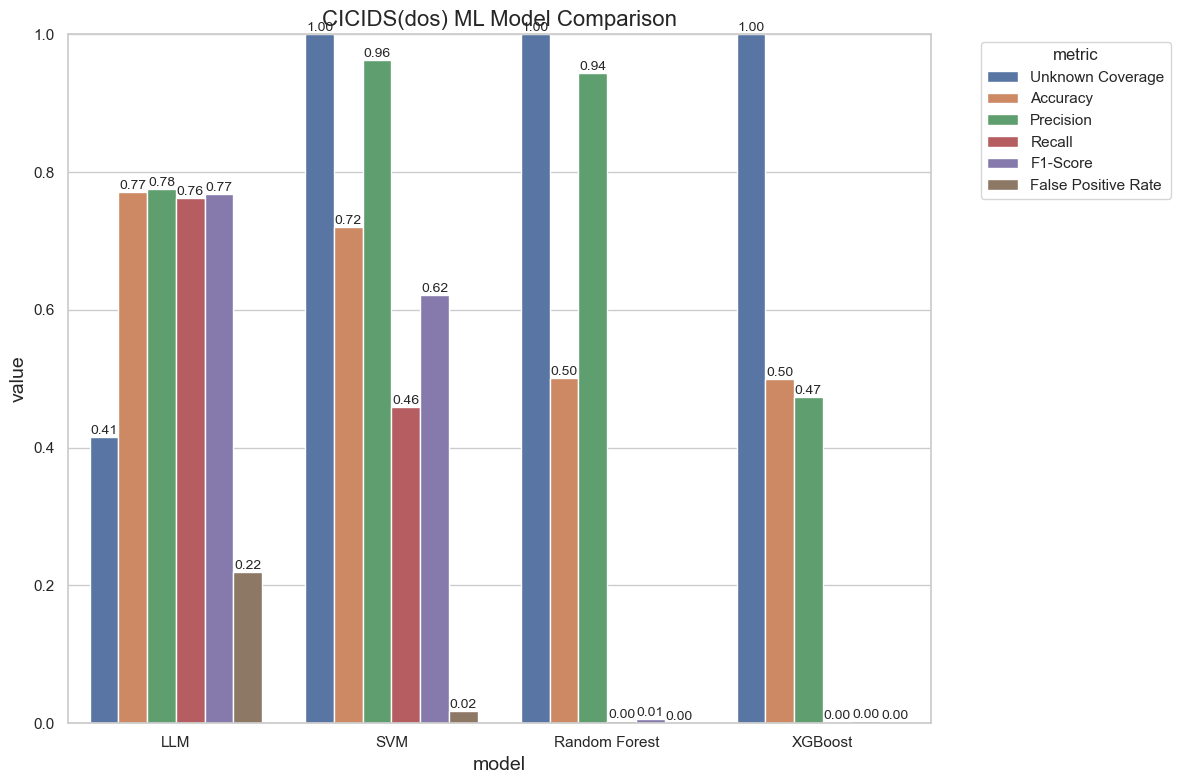

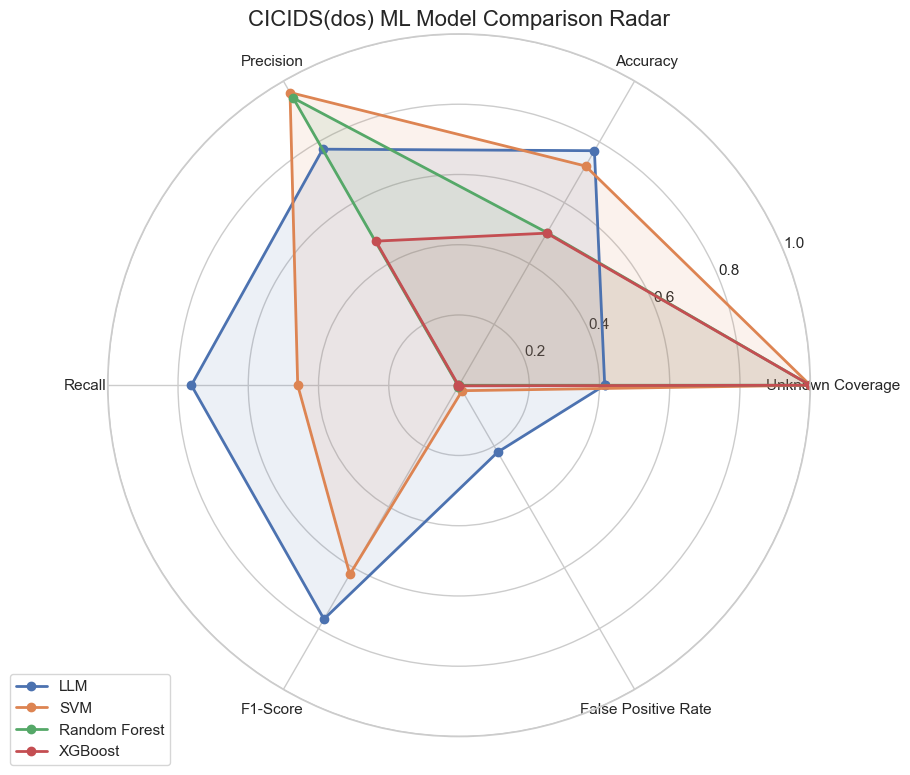

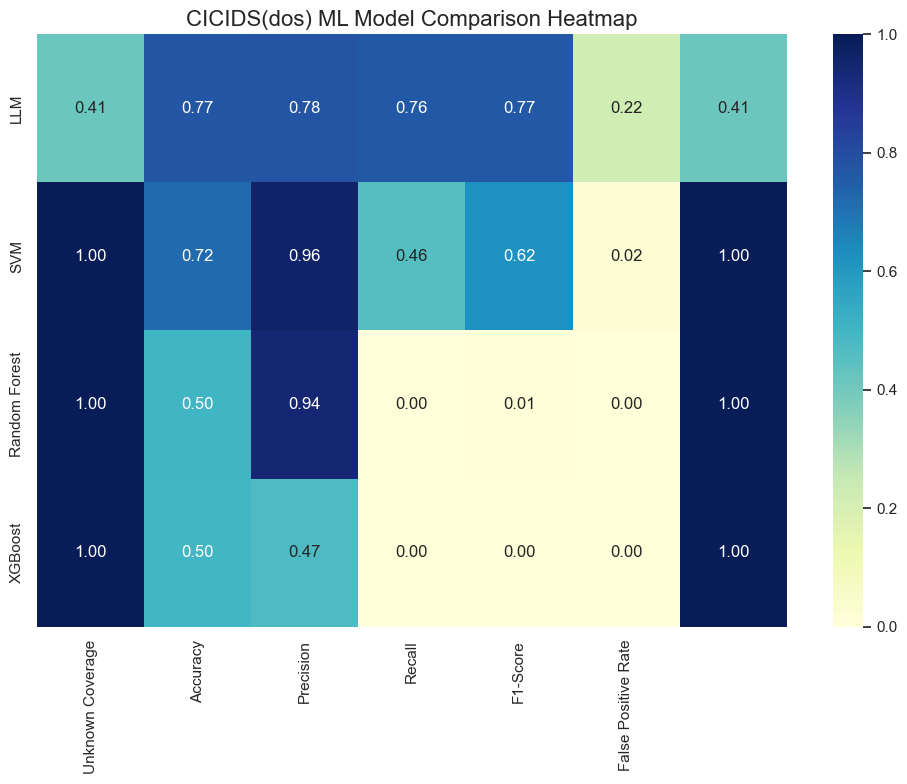

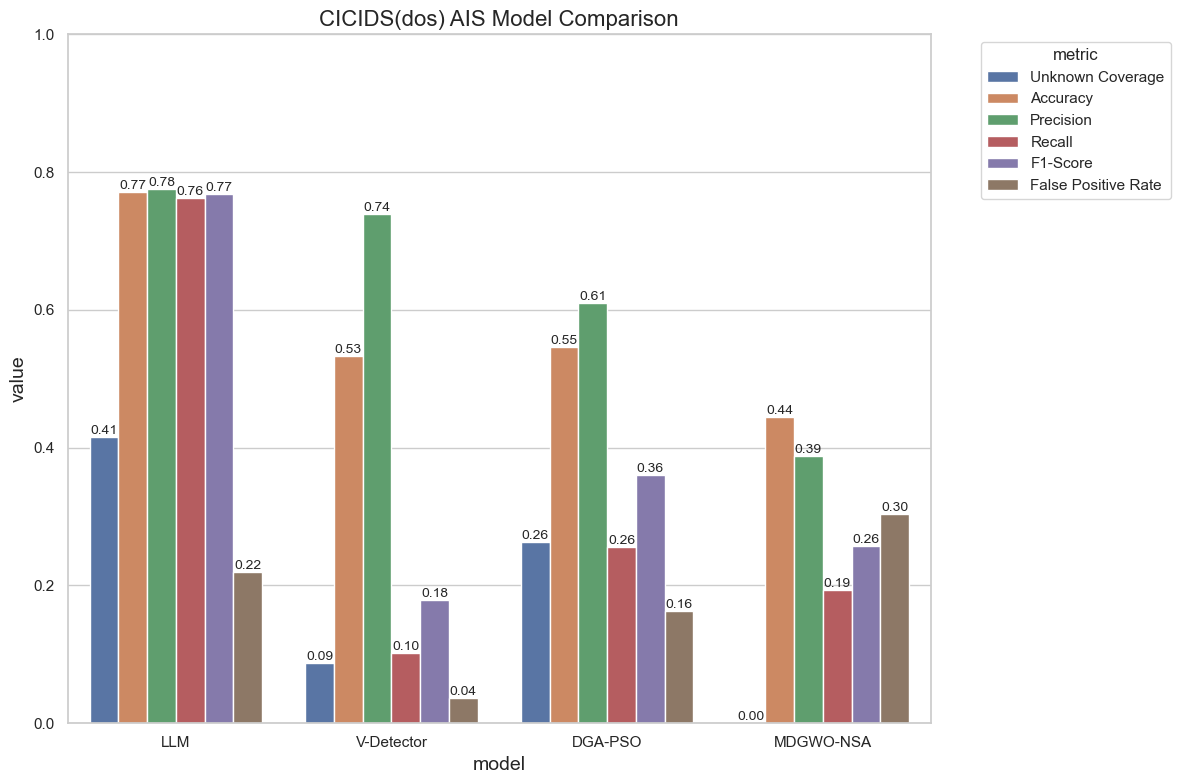

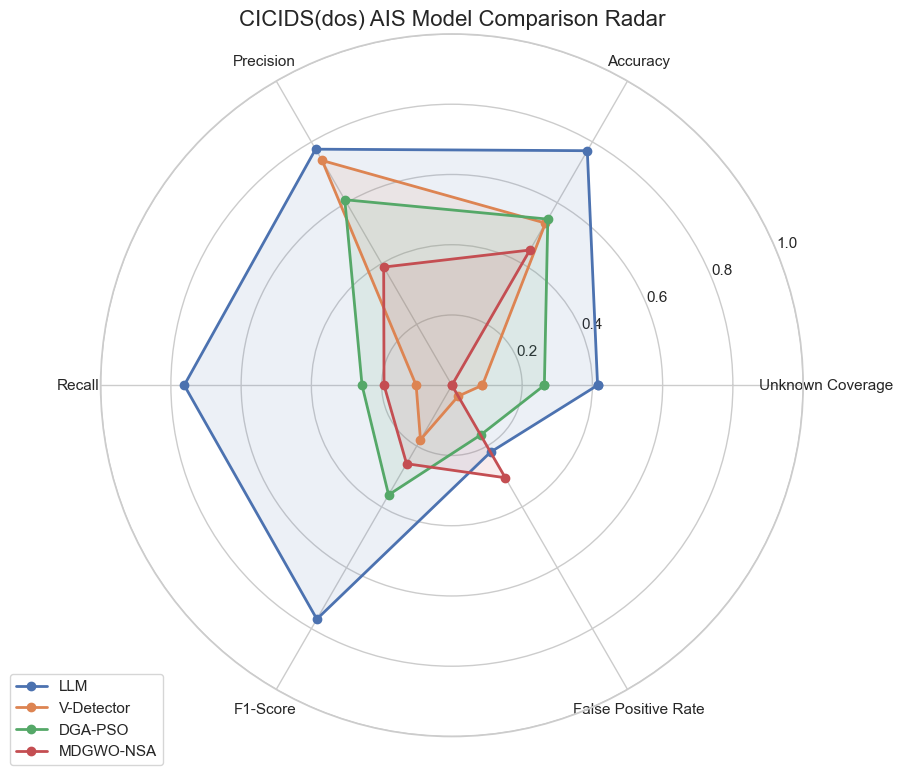

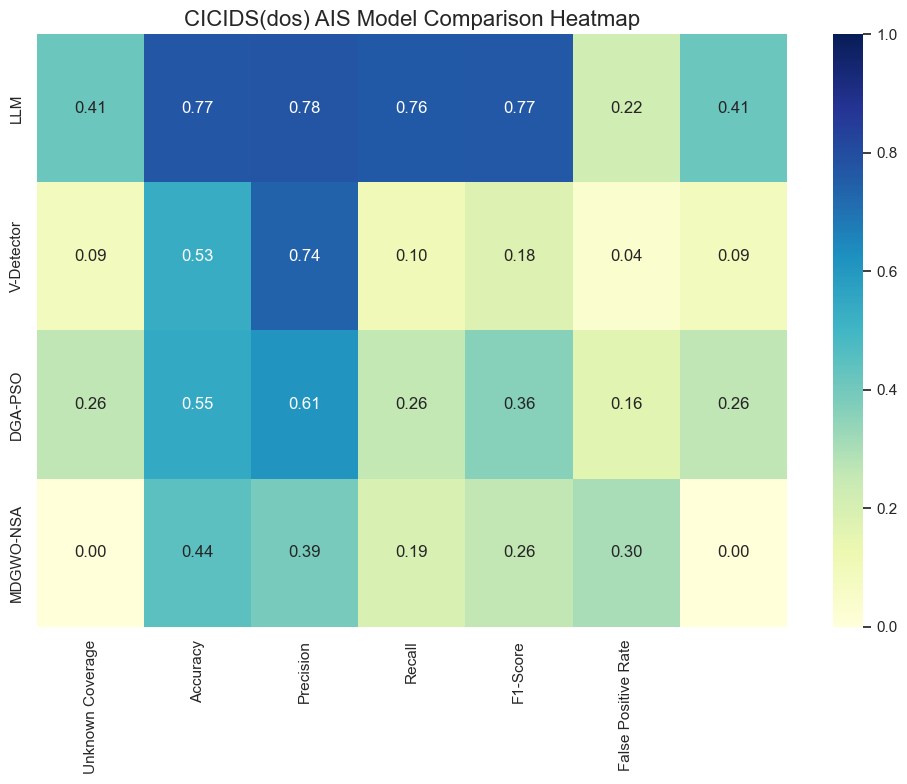

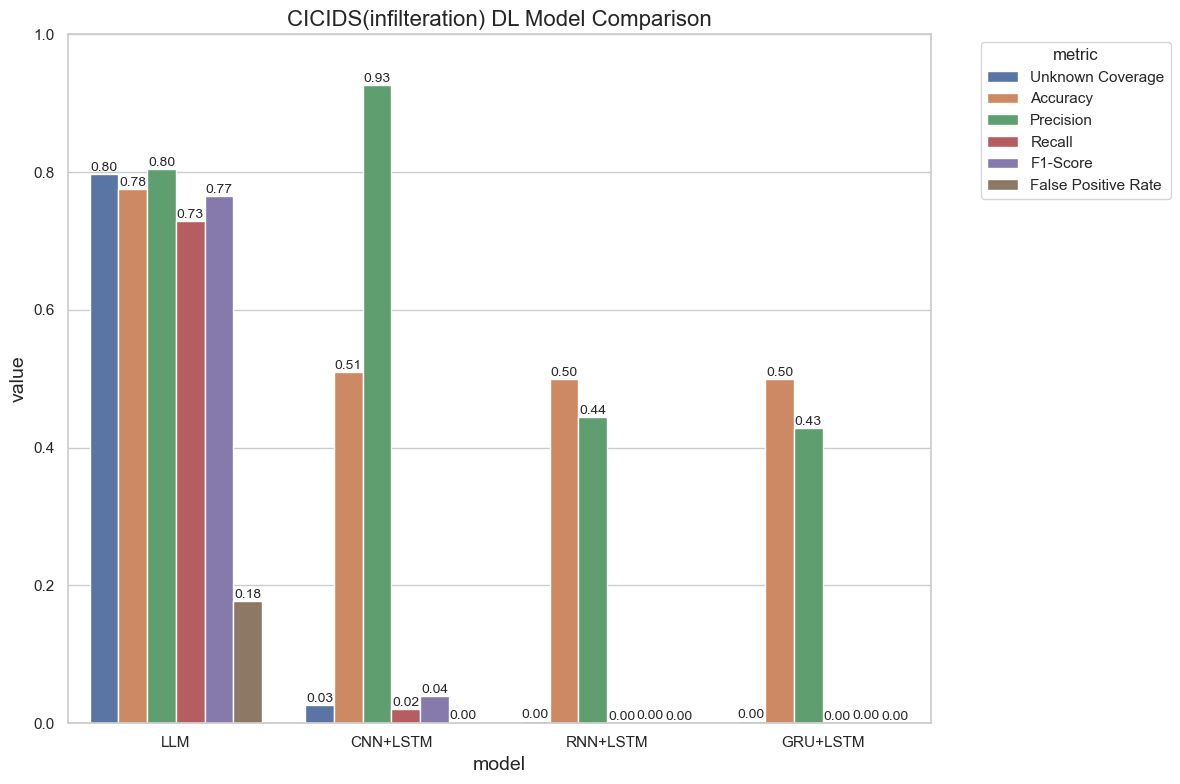

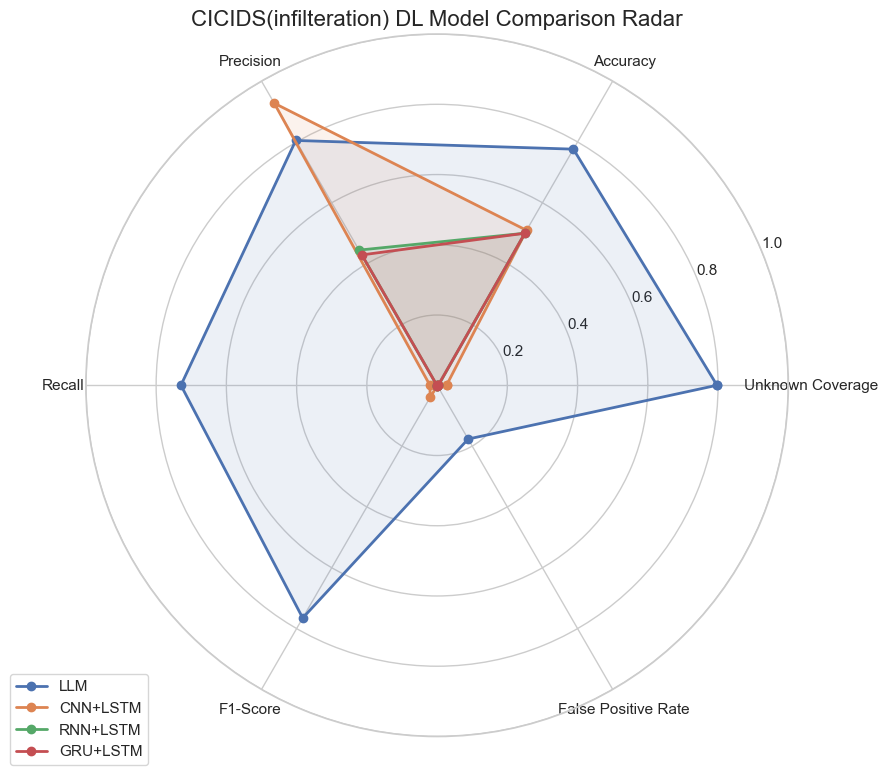

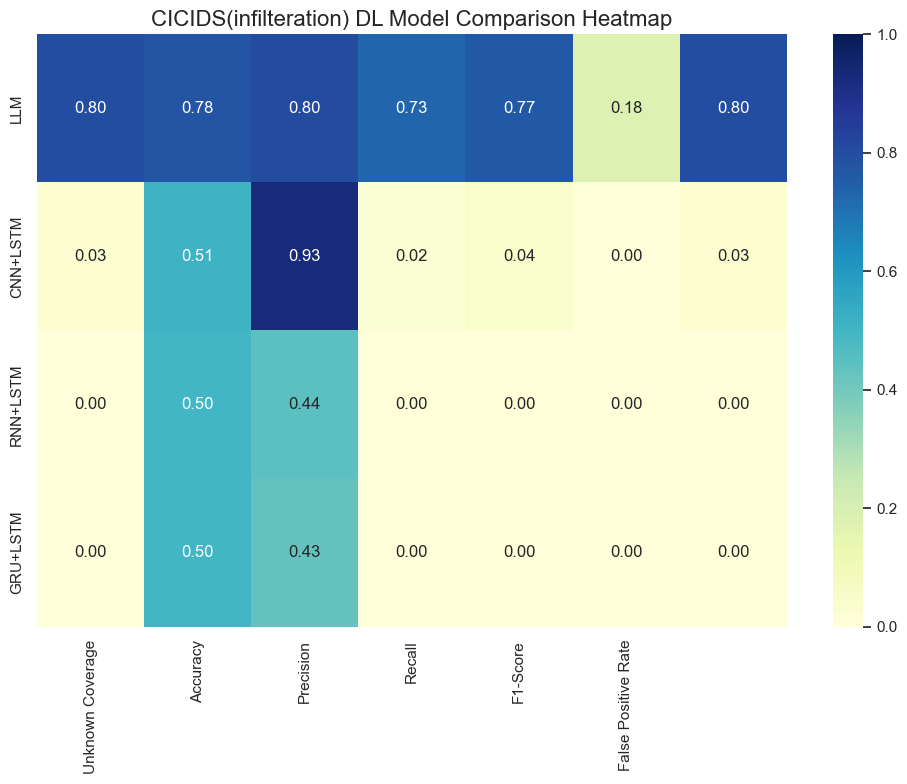

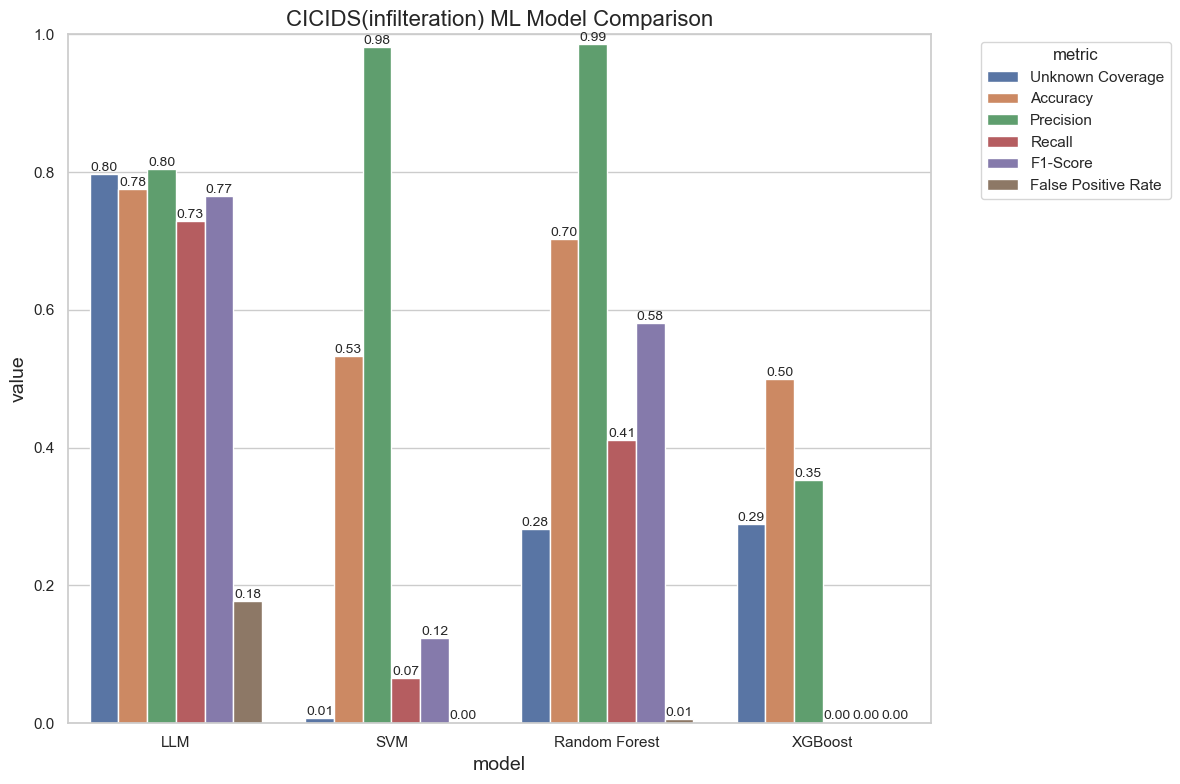

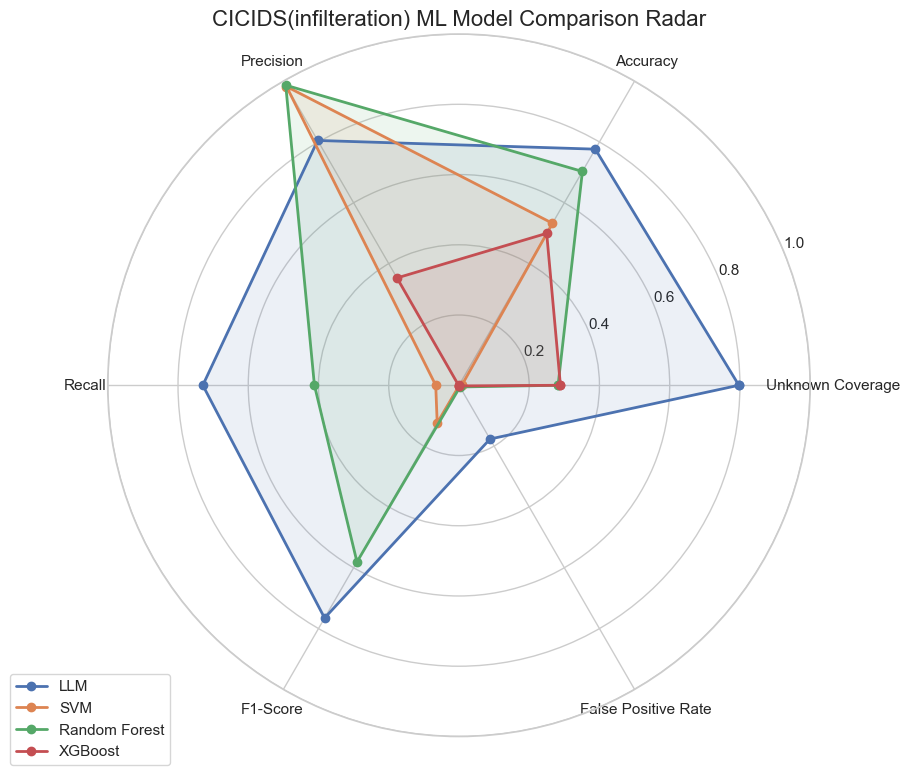

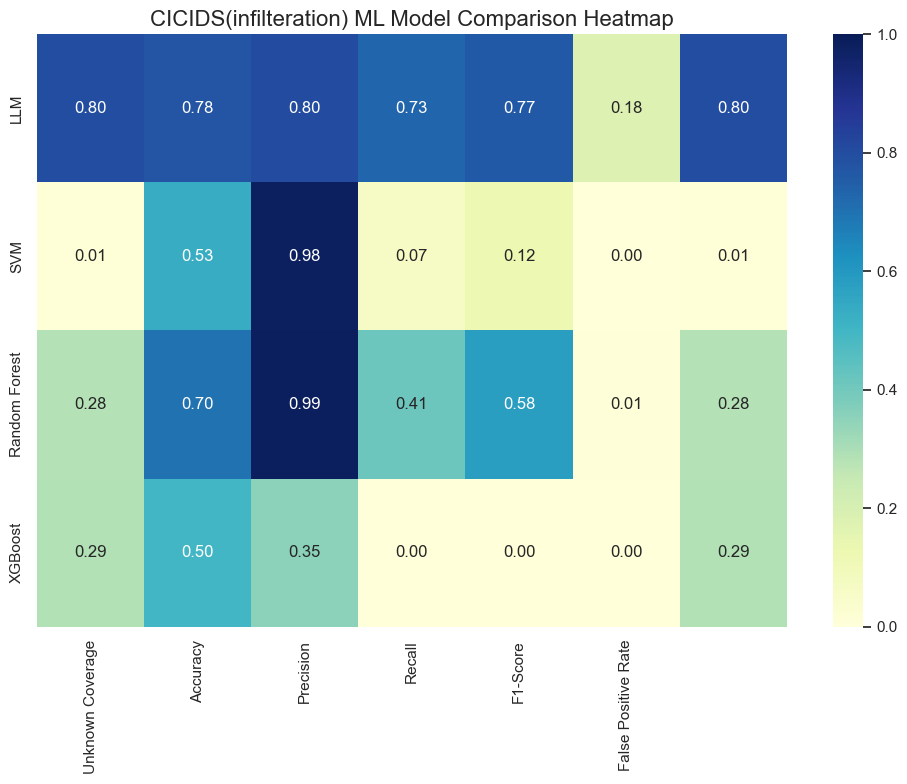

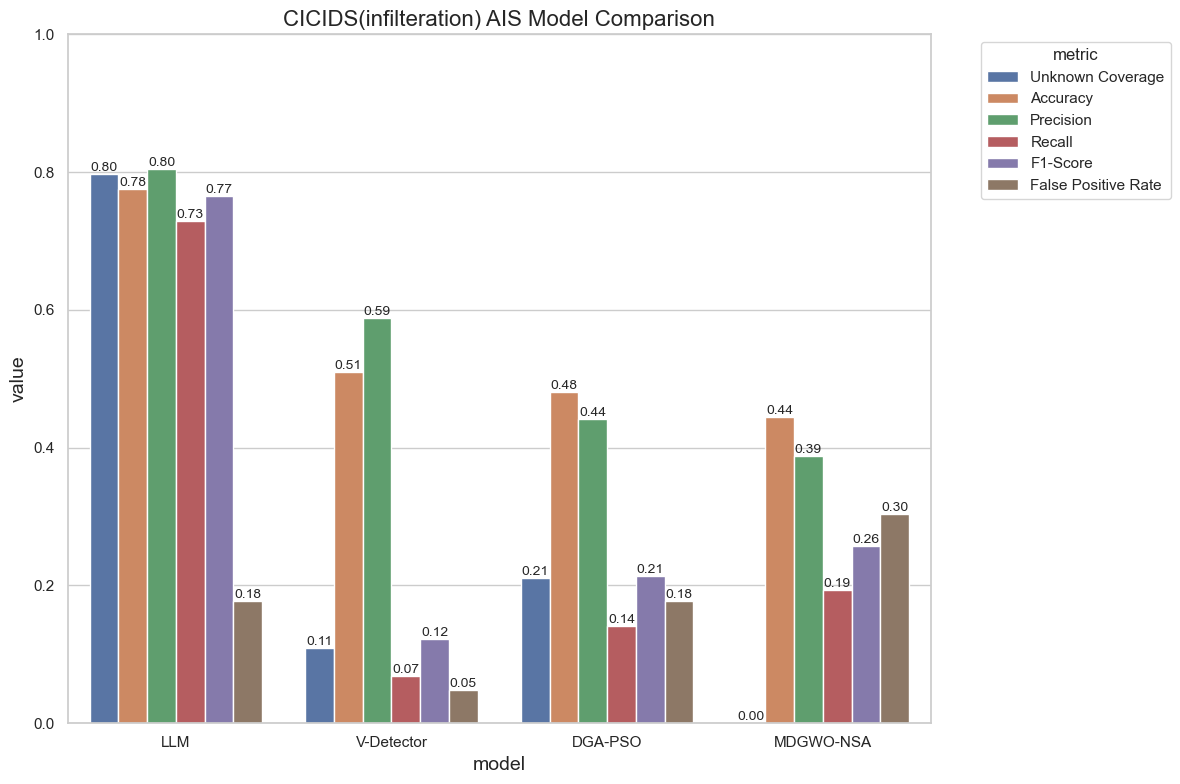

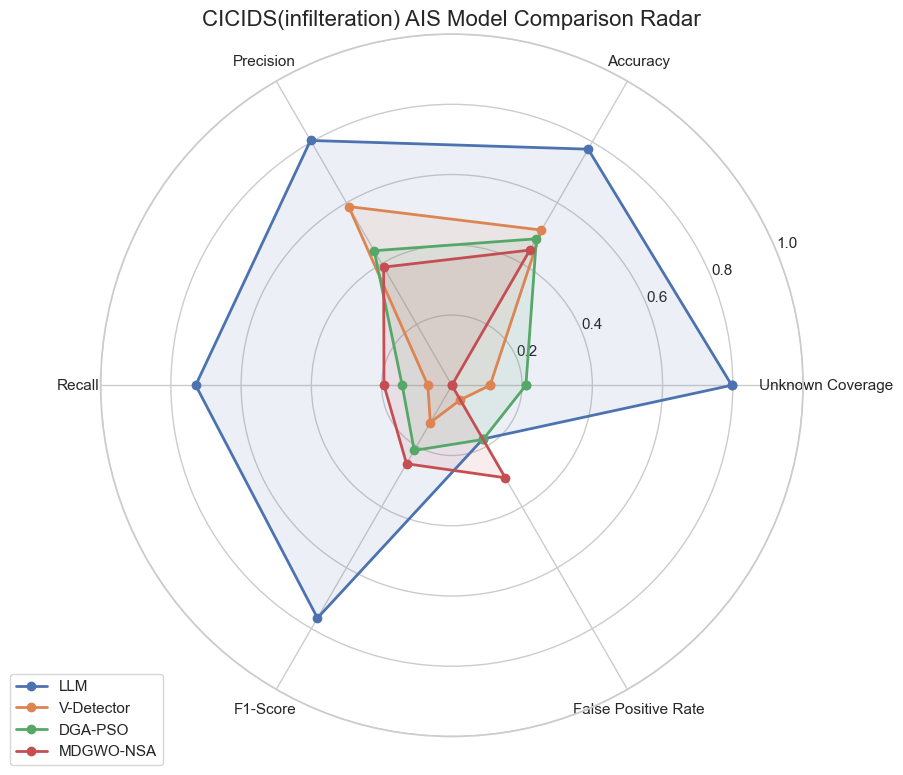

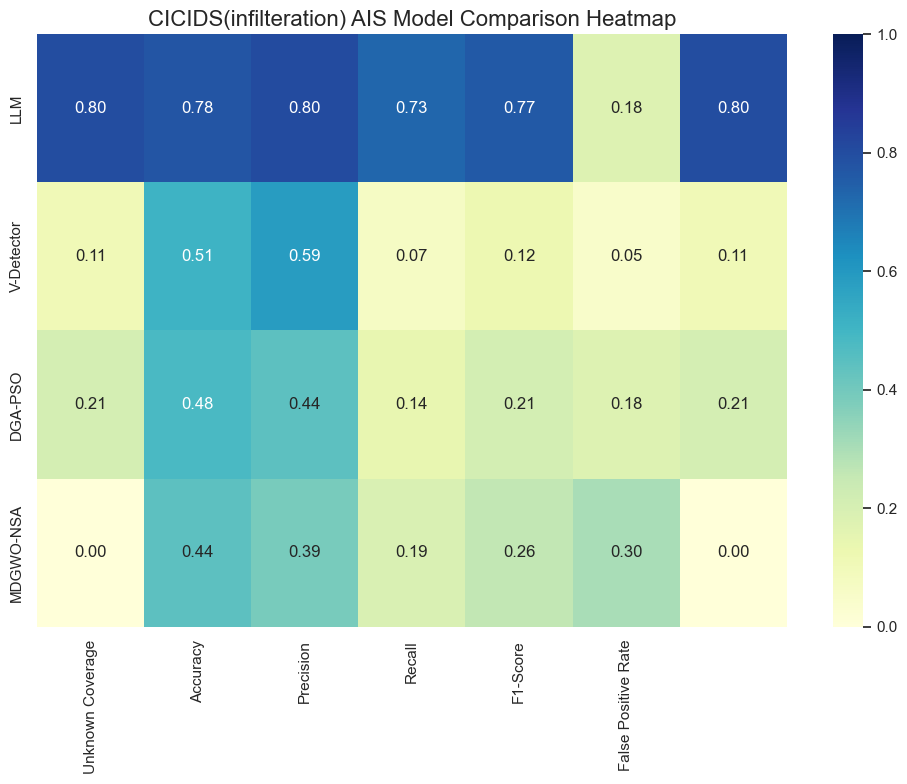

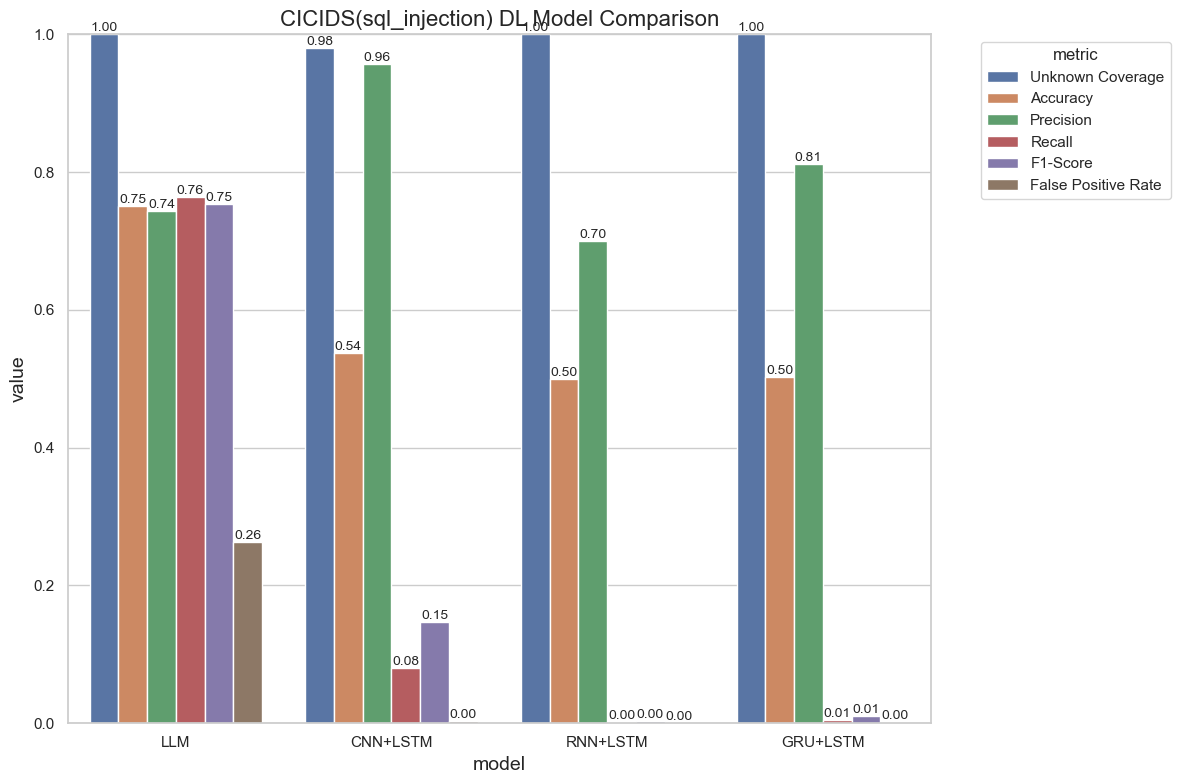

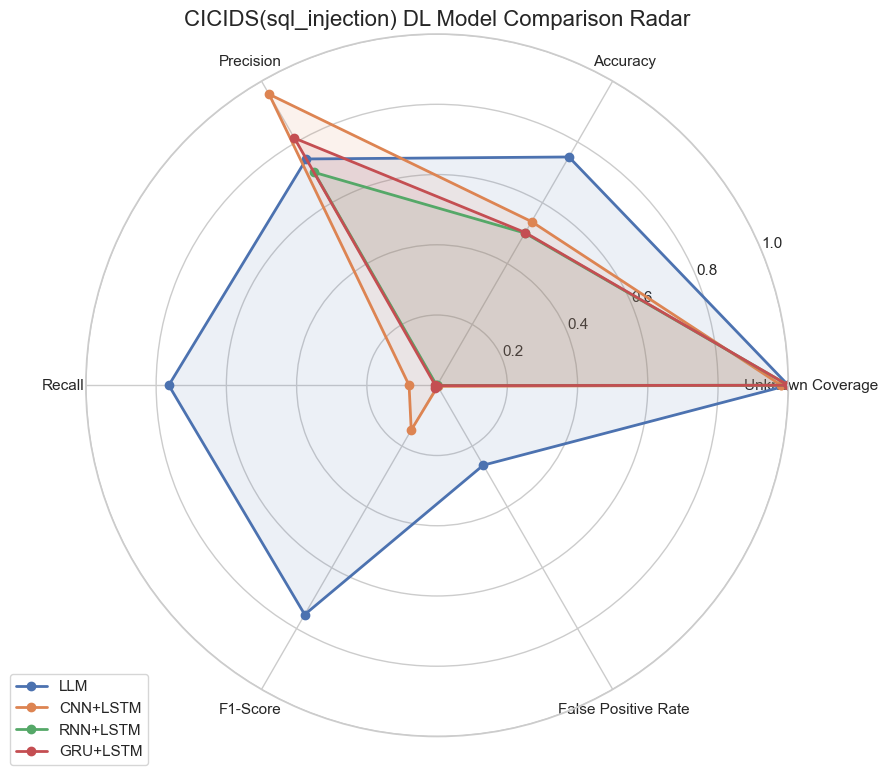

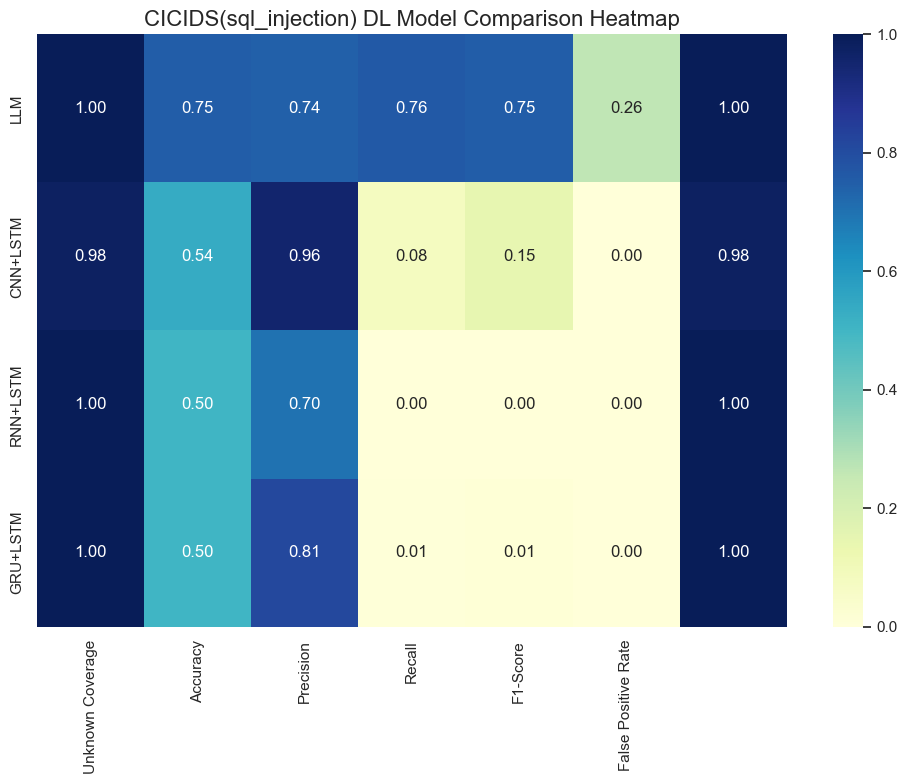

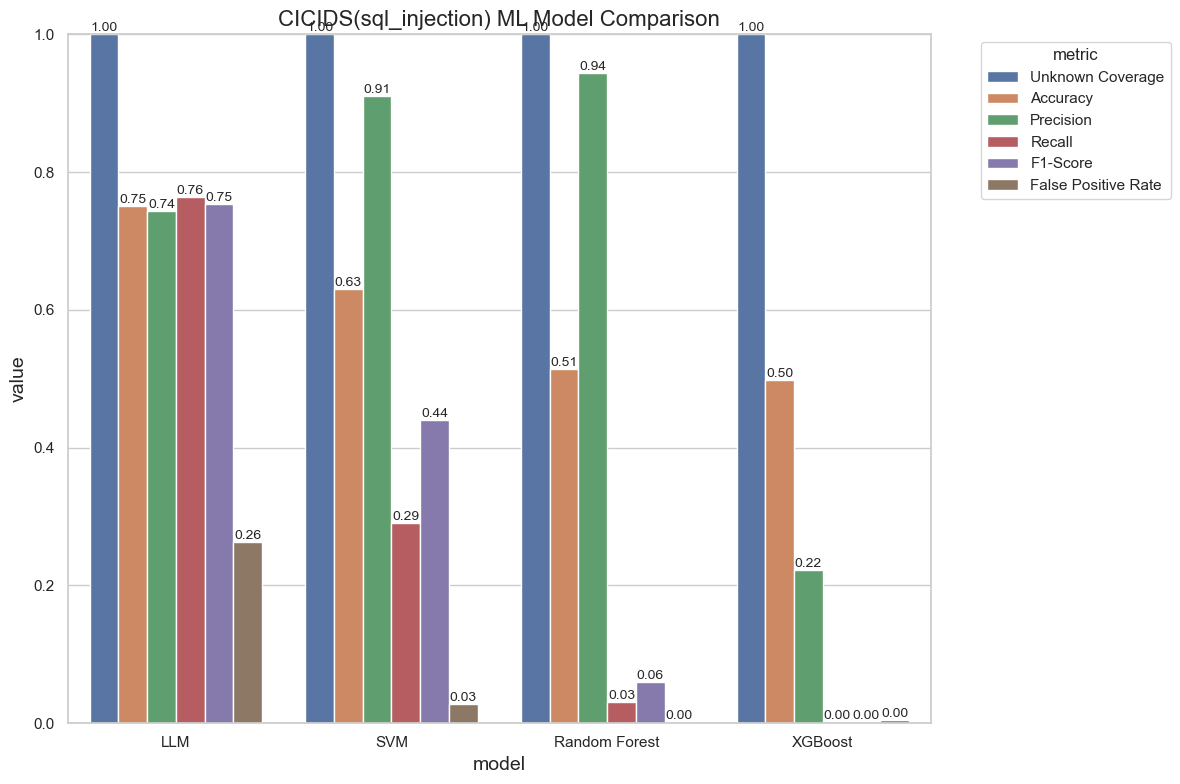

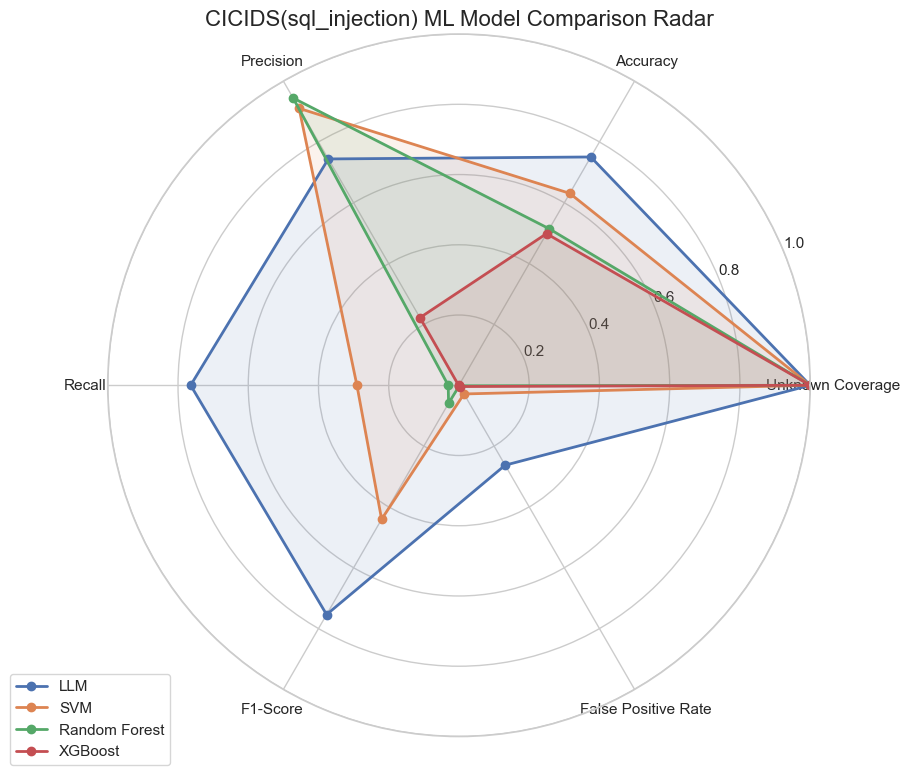

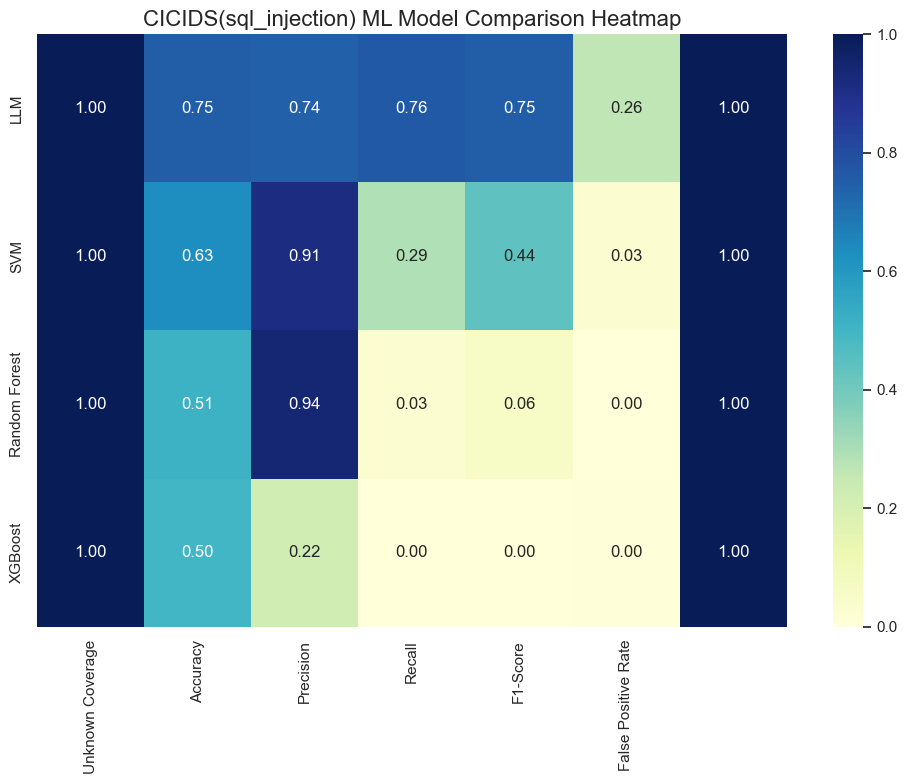

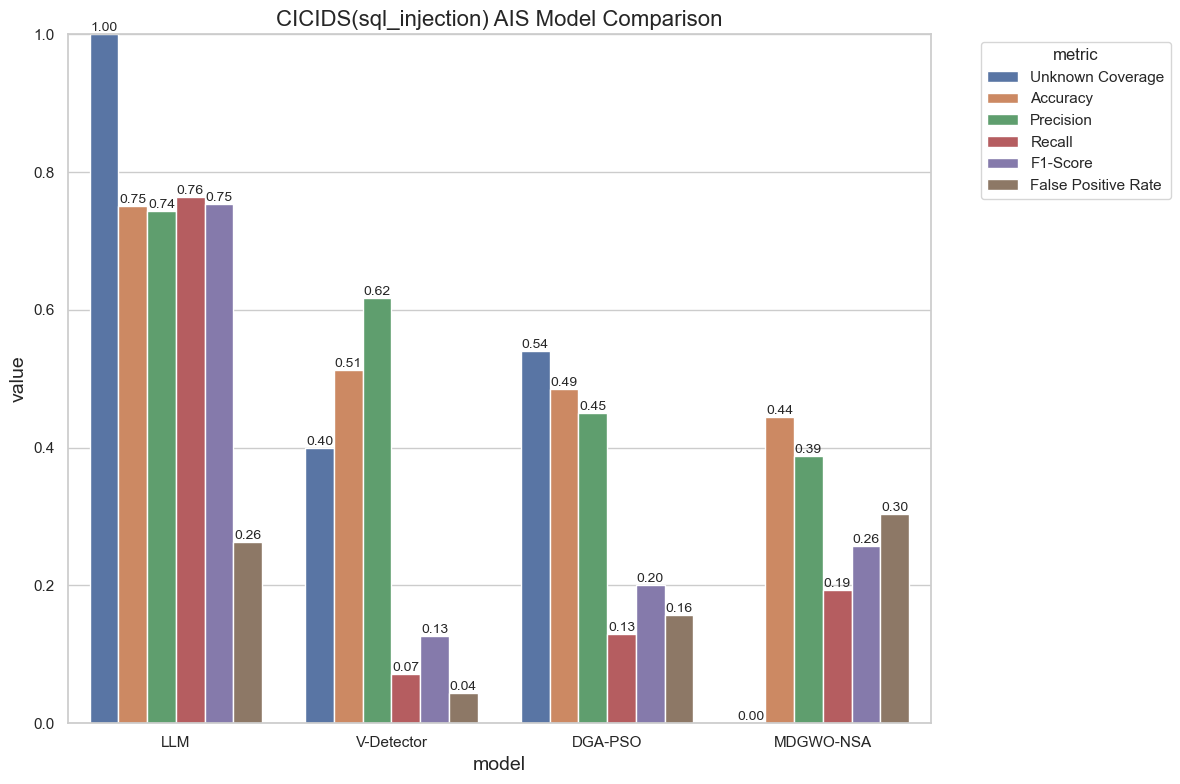

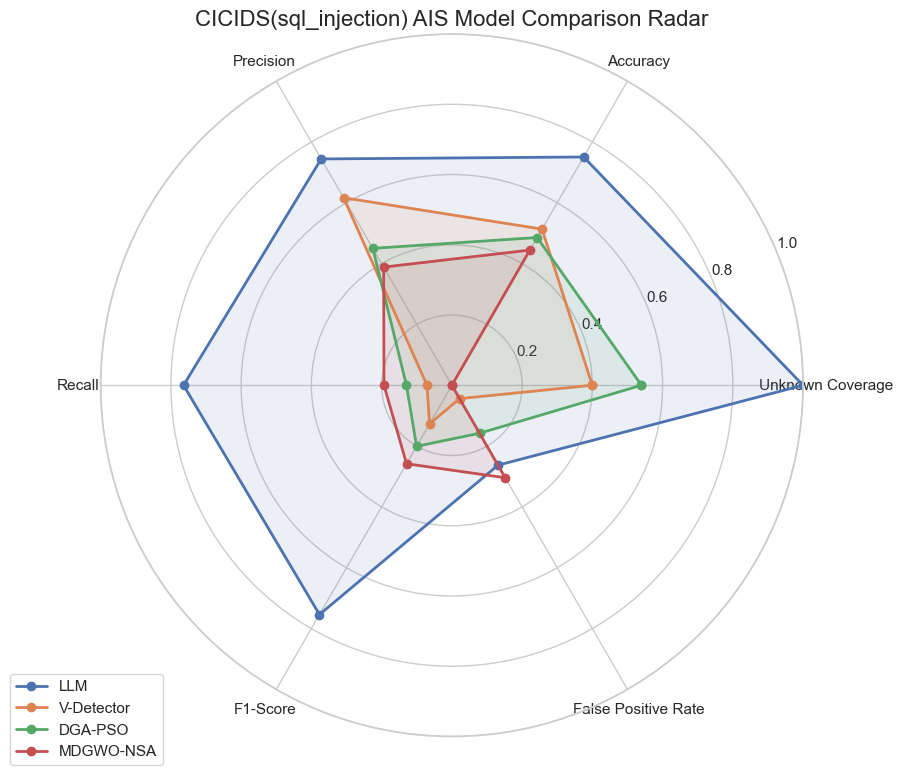

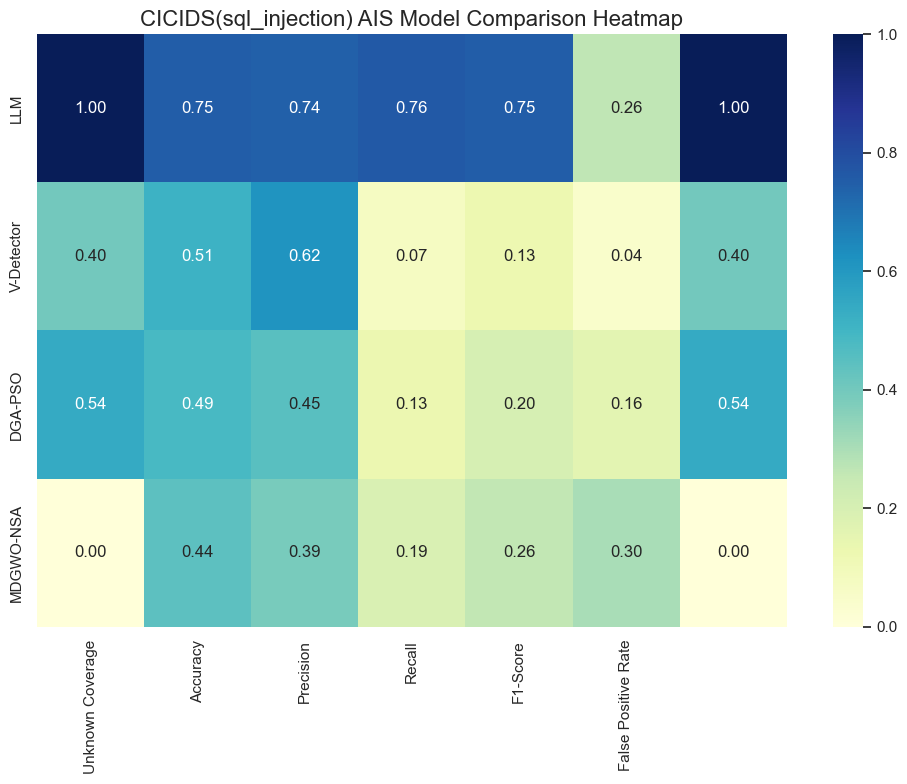

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

def plot_model_comparison(models, metrics, values, title="Model Performance Comparison", figsize=(12, 8), save_path=None):
    """
    绘制不同模型各项指标的对比图
    
    参数:
    models: list, 模型名称列表
    metrics: list, 评估指标名称列表
    values: list of lists, 每个模型对应的各项指标值
    title: str, 图表标题
    figsize: tuple, 图表大小
    save_path: str, 保存路径，如果为None则不保存

    """
    # 创建DataFrame以便使用seaborn
    data = []
    for i, model in enumerate(models):
        for j, metric in enumerate(metrics):
            data.append({
                'model': model,
                'metric': metric,
                'value': values[i][j]
            })
    df = pd.DataFrame(data)
    
    # 设置样式
    sns.set(style="whitegrid")
    plt.figure(figsize=figsize)
    
    # 绘制条形图
    ax = sns.barplot(x='model', y='value', hue='metric', data=df)
    
    # 添加标题和标签
    plt.title(title, fontsize=16)
    plt.xlabel('model', fontsize=14)
    plt.ylabel('value', fontsize=14)
    plt.ylim(0, 1.0)  # 假设指标值在0-1之间
    
    # 在条形上方添加数值标签
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', fontsize=10)
    
    # 调整图例位置
    plt.legend(title='metric', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    
    # 保存图表
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    # plt.show()

def plot_model_comparison_radar(models, metrics, values, title="model performance radar chart", figsize=(10, 8), save_path=None):
    """
    绘制不同模型各项指标的雷达图对比
    
    参数:
    models: list, 模型名称列表
    metrics: list, 评估指标名称列表
    values: list of lists, 每个模型对应的各项指标值
    title: str, 图表标题
    figsize: tuple, 图表大小
    save_path: str, 保存路径，如果为None则不保存
    """
    # 设置图表
    plt.figure(figsize=figsize)
    
    # 计算雷达图的角度
    angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False).tolist()
    angles += angles[:1]  # 闭合雷达图
    
    # 设置极坐标图
    ax = plt.subplot(111, polar=True)
    
    # 添加每个模型的数据
    for i, model in enumerate(models):
        values_model = values[i]
        values_model += values_model[:1]  # 闭合雷达图
        ax.plot(angles, values_model, 'o-', linewidth=2, label=model)
        ax.fill(angles, values_model, alpha=0.1)
    
    # 设置刻度标签
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics)
    
    # 设置y轴范围
    ax.set_ylim(0, 1)
    
    # 添加图例和标题
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.title(title, fontsize=16)
    
    plt.tight_layout()
    
    # 保存图表
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    # plt.show()

def plot_model_comparison_heatmap(models, metrics, values, title="model performance heatmap", figsize=(10, 8), save_path=None):
    """
    绘制不同模型各项指标的热力图对比
    
    参数:
    models: list, 模型名称列表
    metrics: list, 评估指标名称列表
    values: list of lists, 每个模型对应的各项指标值
    title: str, 图表标题
    figsize: tuple, 图表大小
    save_path: str, 保存路径，如果为None则不保存
    """
    # 创建数据矩阵
    data_matrix = np.array(values)
    
    # 设置图表
    plt.figure(figsize=figsize)
    
    # 绘制热力图
    ax = sns.heatmap(data_matrix, annot=True, fmt=".2f", cmap="YlGnBu",
                     xticklabels=metrics, yticklabels=models, vmin=0, vmax=1)
    
    # 添加标题和标签
    plt.title(title, fontsize=16)
    plt.tight_layout()
    
    # 保存图表
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    # plt.show()


# DL模型数据
dl_models = ['LLM', 'CNN+LSTM', 'RNN+LSTM', 'GRU+LSTM']
dl_values_bot = [
    [1, 0.7766, 0.7994, 0.7386, 0.7678, 0.1854],  # LLM的各项指标
    [0.9464, 0.5334, 0.8175, 0.0860, 0.1556, 0.0192],  # CNN+LSTM的各项指标
    [0.5009, 0.5795, 0.9938, 0.1600, 0.2756, 0.0010],  # RNN+LSTM的各项指标
    [0.5010, 0.5000, 0.5000, 0.0018, 0.0036, 0.0018]   # GRU+LSTM的各项指标
]
dl_values_bruteforce = [
    [1, 0.7552, 0.7513, 0.7630, 0.7571, 0.2526],  # LLM的各项指标
    [0.7980, 0.6229, 0.9392, 0.2628, 0.4107, 0.0166],  # CNN+LSTM的各项指标
    [0.3480, 0.4995, 0.4000, 0.0020, 0.0040, 0.0030],  # RNN+LSTM的各项指标
    [0.3480, 0.5000, 0.5000, 0.0004, 0.0008, 0.0004]   # GRU+LSTM的各项指标
]
dl_values_ddos = [
    [1, 0.7707, 0.7747, 0.7634, 0.7690, 0.2220],  # LLM的各项指标
    [0.2400, 0.5192, 0.6975, 0.0678, 0.1236, 0.0282],  # CNN+LSTM的各项指标
    [1.0000, 0.6020, 0.9980, 0.2044, 0.3393, 0.0004],  # RNN+LSTM的各项指标
    [1.0000, 0.5931, 0.9936, 0.1874, 0.3153, 0.0012]   # GRU+LSTM的各项指标
]
dl_values_dos = [
    [0.4148, 0.7710, 0.7760, 0.7620, 0.7689, 0.2200],  # LLM的各项指标
    [0.4021, 0.5324, 0.9197, 0.0710, 0.1318, 0.0062],  # CNN+LSTM的各项指标
    [1.0000, 0.5012, 0.9286, 0.0026, 0.0052, 0.0002],  # RNN+LSTM的各项指标
    [1.0000, 0.6810, 0.9860, 0.3672, 0.5351, 0.0052]   # GRU+LSTM的各项指标
]
dl_values_infilteration = [
    [0.7970, 0.7763, 0.8049, 0.7294, 0.7653, 0.1768],  # LLM的各项指标
    [0.0268, 0.5094, 0.9273, 0.0204, 0.0399, 0.0016],  # CNN+LSTM的各项指标
    [0.0039, 0.4999, 0.4444, 0.0008, 0.0016, 0.0010],  # RNN+LSTM的各项指标
    [0.0034, 0.4999, 0.4286, 0.0006, 0.0012, 0.0008]   # GRU+LSTM的各项指标
]
dl_values_sql_injection = [
    [1.0000, 0.7506, 0.7441, 0.7640, 0.7539, 0.2628],  # LLM的各项指标
    [0.9800, 0.5381, 0.9568, 0.0798, 0.1473, 0.0036],  # CNN+LSTM的各项指标
    [1.0000, 0.5004, 0.7000, 0.0014, 0.0028, 0.0006],  # RNN+LSTM的各项指标
    [1.0000, 0.5020, 0.8125, 0.0052, 0.0103, 0.0012]   # GRU+LSTM的各项指标
]

# ML模型数据
ml_models = ['LLM','SVM', 'Random Forest', 'XGBoost']
ml_values_bot = [
    [1, 0.7766, 0.7994, 0.7386, 0.7678, 0.1854],  # LLM的各项指标
    [0.8165, 0.6301, 0.9232, 0.2838, 0.4341, 0.0236],  # SVM的各项指标
    [1.0000, 0.5131, 0.9645, 0.0272, 0.0529, 0.0010],  # Random Forest的各项指标
    [1.0000, 0.4966, 0.2821, 0.0044, 0.0087, 0.0112]   # XGBoost的各项指标
]
ml_values_bruteforce = [
    [1, 0.7552, 0.7513, 0.7630, 0.7571, 0.2526],  # LLM的各项指标
    [0.6280, 0.5872, 0.8818, 0.2014, 0.3279, 0.0270],  # SVM的各项指标
    [0.4320, 0.5000, 0.5000, 0.0002, 0.0004, 0.0002],  # Random Forest的各项指标
    [0.4400, 0.4997, 0.4348, 0.0020, 0.0040, 0.0026]   # XGBoost的各项指标
]
ml_values_ddos = [
    [1, 0.7707, 0.7747, 0.7634, 0.7690, 0.2220],  # LLM的各项指标
    [1.0000, 0.7194, 0.9586, 0.4586, 0.6204, 0.0198],  # SVM的各项指标
    [1.0000, 0.5168, 0.9667, 0.0348, 0.0672, 0.0012],  # Random Forest的各项指标
    [0.9997, 0.4995, 0.2222, 0.0004, 0.0008, 0.0014]   # XGBoost的各项指标
]
ml_values_dos = [
    [0.4148, 0.7710, 0.7760, 0.7620, 0.7689, 0.2200],  # LLM的各项指标
    [1.0000, 0.7206, 0.9623, 0.4592, 0.6217, 0.0180],  # SVM的各项指标
    [1.0000, 0.5016, 0.9444, 0.0034, 0.0068, 0.0002],  # Random Forest的各项指标
    [1.0000, 0.4999, 0.4737, 0.0018, 0.0036, 0.0020]   # XGBoost的各项指标
]
ml_values_infilteration = [
    [0.7970, 0.7763, 0.8049, 0.7294, 0.7653, 0.1768],  # LLM的各项指标
    [0.0081, 0.5325, 0.9822, 0.0662, 0.1240, 0.0012],  # SVM的各项指标
    [0.2821, 0.7030, 0.9866, 0.4116, 0.5809, 0.0056],  # Random Forest的各项指标
    [0.2889, 0.4995, 0.3529, 0.0012, 0.0024, 0.0022]   # XGBoost的各项指标
]
ml_values_sql_injection = [
    [1.0000, 0.7506, 0.7441, 0.7640, 0.7539, 0.2628],  # LLM的各项指标
    [1.0000, 0.6310, 0.9104, 0.2906, 0.4406, 0.0286],  # SVM的各项指标
    [1.0000, 0.5144, 0.9444, 0.0306, 0.0593, 0.0018],  # Random Forest的各项指标
    [1.0000, 0.4985, 0.2222, 0.0012, 0.0024, 0.0042]   # XGBoost的各项指标
]

# AIS模型数据
als_model = ['LLM','V-Detector', 'DGA-PSO', 'MDGWO-NSA']
als_values_bot = [
    [1, 0.7766, 0.7994, 0.7386, 0.7678, 0.1854],  # LLM的各项指标
    [0.4971, 0.5053, 0.5957, 0.0330, 0.0625, 0.0224],  # V-Detector的各项指标
    [0.5011, 0.5092, 0.5182, 0.2626, 0.3486, 0.2442],  # DGA-PSO的各项指标
    [0.0000, 0.5241, 0.5549, 0.2436, 0.3386, 0.1954]   # MDGWO-NSA的各项指标
]

als_values_bruteforce = [
    [1, 0.7552, 0.7513, 0.7630, 0.7571, 0.2526],  
    [0.3100, 0.4474, 0.2486, 0.0520, 0.0860, 0.1572],  
    [0.5960, 0.4907, 0.4831, 0.2666, 0.3436, 0.2852],  
    [0.0000, 0.4445, 0.3884, 0.1932, 0.2580, 0.3042]   
]

als_values_ddos = [
    [1, 0.7707, 0.7747, 0.7634, 0.7690, 0.2220],  
    [0.0028, 0.4995, 0.4978, 0.1124, 0.1834, 0.1134],  
    [0.2417, 0.4743, 0.4418, 0.1952, 0.2708, 0.2466],  
    [0.0000, 0.4445, 0.3884, 0.1932, 0.2580, 0.3042] 
]

als_values_dos = [
    [0.4148, 0.7710, 0.7760, 0.7620, 0.7689, 0.2200],  
    [0.0869, 0.5329, 0.7388, 0.1018, 0.1789, 0.0360],  
    [0.2633, 0.5461, 0.6099, 0.2558, 0.3604, 0.1636],  
    [0.0000, 0.4445, 0.3884, 0.1932, 0.2580, 0.3042]
]

als_values_infilteration = [
    [0.7970, 0.7763, 0.8049, 0.7294, 0.7653, 0.1768],  
    [0.1090, 0.5102, 0.5876, 0.0684, 0.1225, 0.0480],  
    [0.2109, 0.4816, 0.4424, 0.1414, 0.2143, 0.1782],  
    [0.0000, 0.4445, 0.3884, 0.1932, 0.2580, 0.3042] 
]

als_values_sql_injection = [
    [1.0000, 0.7506, 0.7441, 0.7640, 0.7539, 0.2628],  
    [0.4000, 0.5134, 0.6167, 0.0708, 0.1270, 0.0440],  
    [0.5400, 0.4857, 0.4502, 0.1292, 0.2008, 0.1578],  
    [0.0000, 0.4445, 0.3884, 0.1932, 0.2580, 0.3042] 
]


metrics = ['Unknown Coverage', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'False Positive Rate']

def plot_all_models(unknown_type):

    if unknown_type == 'bot':
        dl_values = dl_values_bot
        ml_values = ml_values_bot
        als_values = als_values_bot
    elif unknown_type == 'bruteforce':
        dl_values = dl_values_bruteforce
        ml_values = ml_values_bruteforce
        als_values = als_values_bruteforce
    elif unknown_type == 'ddos':
        dl_values = dl_values_ddos
        ml_values = ml_values_ddos
        als_values = als_values_ddos
    elif unknown_type == 'dos':
        dl_values = dl_values_dos
        ml_values = ml_values_dos
        als_values = als_values_dos
    elif unknown_type == 'infilteration':
        dl_values = dl_values_infilteration
        ml_values = ml_values_infilteration
        als_values = als_values_infilteration
    elif unknown_type == 'sql_injection':
        dl_values = dl_values_sql_injection
        ml_values = ml_values_sql_injection
        als_values = als_values_sql_injection
        
    # DL模型    
    plot_model_comparison(dl_models, metrics, dl_values, 
        title=f"CICIDS({unknown_type}) DL Model Comparison", 
        save_path=f"bar/{unknown_type}_dl_model_comparison_bar.png")
    plot_model_comparison_radar(dl_models, metrics, dl_values,
        title=f"CICIDS({unknown_type}) DL Model Comparison Radar",
        save_path=f"radar/{unknown_type}_dl_model_comparison_radar.png")
    plot_model_comparison_heatmap(dl_models, metrics, dl_values,
        title=f"CICIDS({unknown_type}) DL Model Comparison Heatmap",
        save_path=f"heatmap/{unknown_type}_dl_model_comparison_heatmap.png")
    # ML模型
    plot_model_comparison(ml_models, metrics, ml_values,
        title=f"CICIDS({unknown_type}) ML Model Comparison",
        save_path=f"bar/{unknown_type}_ml_model_comparison_bar.png")
    plot_model_comparison_radar(ml_models, metrics, ml_values,
        title=f"CICIDS({unknown_type}) ML Model Comparison Radar",
        save_path=f"radar/{unknown_type}_ml_model_comparison_radar.png")
    plot_model_comparison_heatmap(ml_models, metrics, ml_values,
        title=f"CICIDS({unknown_type}) ML Model Comparison Heatmap",
        save_path=f"heatmap/{unknown_type}_ml_model_comparison_heatmap.png")
    # AIS模型    
    plot_model_comparison(als_model, metrics, als_values,
        title=f"CICIDS({unknown_type}) AIS Model Comparison",
        save_path=f"bar/{unknown_type}_ais_model_comparison_bar.png")
    plot_model_comparison_radar(als_model, metrics, als_values,
        title=f"CICIDS({unknown_type}) AIS Model Comparison Radar",
        save_path=f"radar/{unknown_type}_ais_model_comparison_radar.png")
    plot_model_comparison_heatmap(als_model, metrics, als_values,
        title=f"CICIDS({unknown_type}) AIS Model Comparison Heatmap",
        save_path=f"heatmap/{unknown_type}_ais_model_comparison_heatmap.png")

plot_all_models('bot')
plot_all_models('bruteforce')
plot_all_models('ddos')
plot_all_models('dos')
plot_all_models('infilteration')
plot_all_models('sql_injection')



In [2]:
import pandas as pd
import os

# 创建保存目录
os.makedirs('csv', exist_ok=True)

def export_to_csv(unknown_type):
    if unknown_type == 'bot':
        dl_values = dl_values_bot
        ml_values = ml_values_bot
        als_values = als_values_bot
    elif unknown_type == 'bruteforce':
        dl_values = dl_values_bruteforce
        ml_values = ml_values_bruteforce
        als_values = als_values_bruteforce
    elif unknown_type == 'ddos':
        dl_values = dl_values_ddos
        ml_values = ml_values_ddos
        als_values = als_values_ddos
    elif unknown_type == 'dos':
        dl_values = dl_values_dos
        ml_values = ml_values_dos
        als_values = als_values_dos
    elif unknown_type == 'infilteration':
        dl_values = dl_values_infilteration
        ml_values = ml_values_infilteration
        als_values = als_values_infilteration
    elif unknown_type == 'sql_injection':
        dl_values = dl_values_sql_injection
        ml_values = ml_values_sql_injection
        als_values = als_values_sql_injection

    # 合并所有模型数据
    model_names = dl_models + ml_models[1:] + als_model[1:]  # 去掉重复的LLM
    all_values = dl_values + ml_values[1:] + als_values[1:]  # 去掉重复的LLM数据
    
    # 定义正确的列名
    metrics_columns = ['model name','Unknown Detection Rate', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'False Positive Rate']
    
    # 创建DataFrame
    df = pd.DataFrame(all_values, columns=metrics_columns, index=model_names)
    
    # 将数值转换为百分比格式
    df = df.applymap(lambda x: f"{x*100:.2f}")
    
    # 保存为CSV
    df.to_csv(f'csv/CICIDS_{unknown_type}_metrics.csv')

# 为每种类型生成CSV
unknown_types = ['bot', 'bruteforce','ddos', 'dos', 'infilteration', 'sql_injection']
for unknown_type in unknown_types:
    export_to_csv(unknown_type)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_23848\1361052232.py:44: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: f"{x*100:.2f}")
